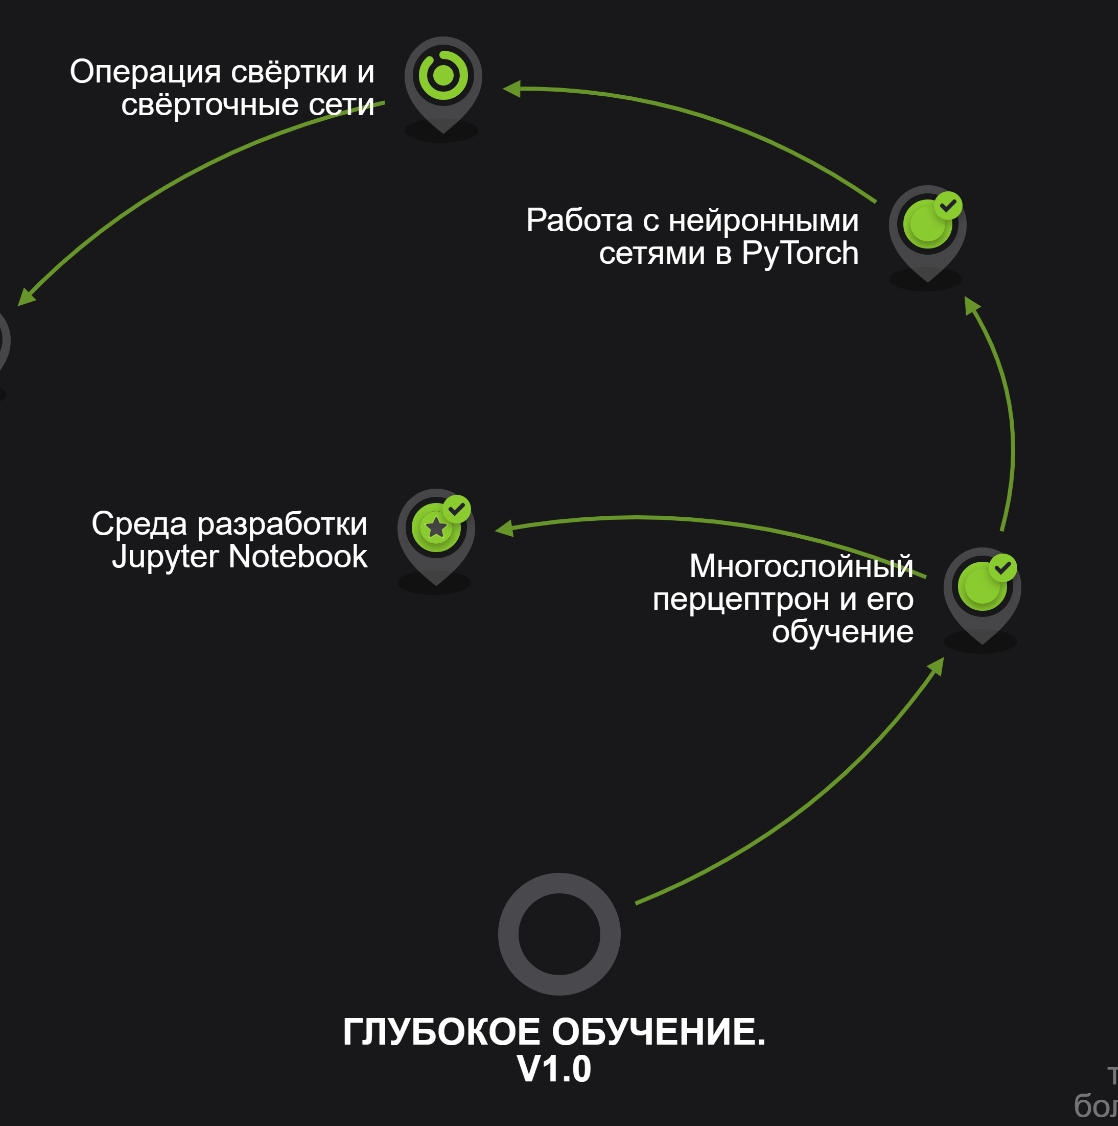

In [1]:
import torch

result = torch.tensor([[8],
                       [4]])
softmax = result.exp() / result.exp().sum()
softmax

tensor([[0.9820],
        [0.0180]])

In [2]:
torch.__version__

'2.0.1+cpu'

In [3]:
# Download data
from torchvision import datasets

download_dir = "./dataset"

train_data = datasets.CIFAR10(root=download_dir, download=True, train=True)
val_data = datasets.CIFAR10(root=download_dir, download=True, train=False)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# 50.000 colour images 32x32
x_train = torch.tensor(train_data.data) / 255.
x_train.shape

torch.Size([50000, 32, 32, 3])

In [5]:
y_train = torch.tensor(train_data.targets)
print(y_train.shape, y_train.min(), y_train.max(), sep='\n')

torch.Size([50000])
tensor(0)
tensor(9)


In [6]:
# Names of the classes
classes = train_data.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./dataset
    Split: Train

In [8]:
# Prepare validation data
x_val = torch.tensor(val_data.data) / 255
y_val = torch.tensor(val_data.targets)
print(x_val.shape, y_val.shape, sep='\n')

torch.Size([10000, 32, 32, 3])
torch.Size([10000])


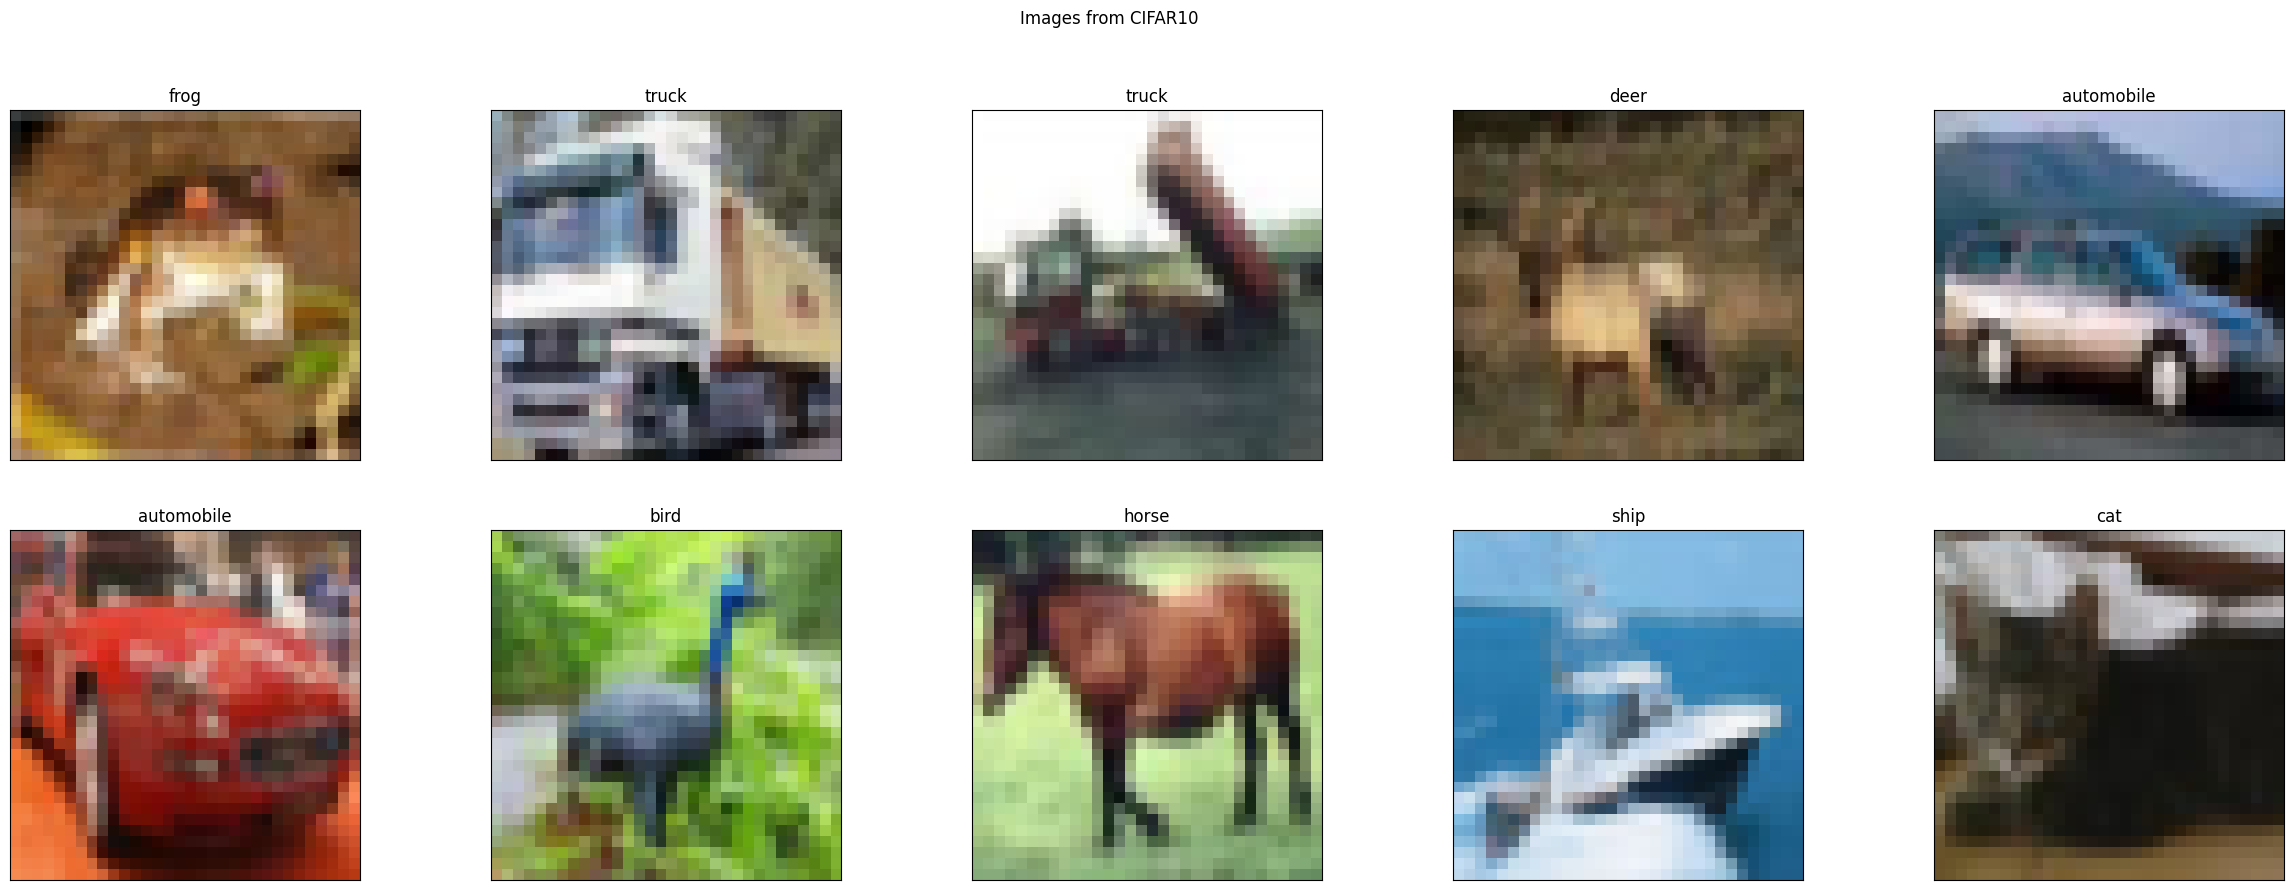

In [9]:
# Let's look at the pictures
import matplotlib.pyplot as plt

h = 2
w = 5

fig, ax = plt.subplots(h, w, figsize=(30, 10))
fig.suptitle('Images from CIFAR10')

for index, (x, y) in enumerate(zip(x_train, y_train)):
    if index >= h * w:
        break
    
    plt.subplot(h, w, index + 1)
    plt.imshow(x)
    plt.xticks([])  # Remove coordinates from axes
    plt.yticks([])
    plt.title(classes[y])
plt.show();

In [10]:
# Image consist of numbers
print(x_train[0].shape, x_train.min(), x_train.max(), x_train.dtype, sep='\n')

torch.Size([32, 32, 3])
tensor(0.)
tensor(1.)
torch.float32


In [11]:
# Convolution
conv_layer = torch.nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    padding=1,
    padding_mode='zeros',
    stride=1,
    dilation=1
)

x = torch.rand(2, 3, 32, 32)  # 2 pictures with 3 channels
print(f'Shape before convolution {x.shape}')
x = conv_layer(x)
print(f'Shape before convolution {x.shape}')

Shape before convolution torch.Size([2, 3, 32, 32])
Shape before convolution torch.Size([2, 10, 32, 32])


# Experiment for report

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

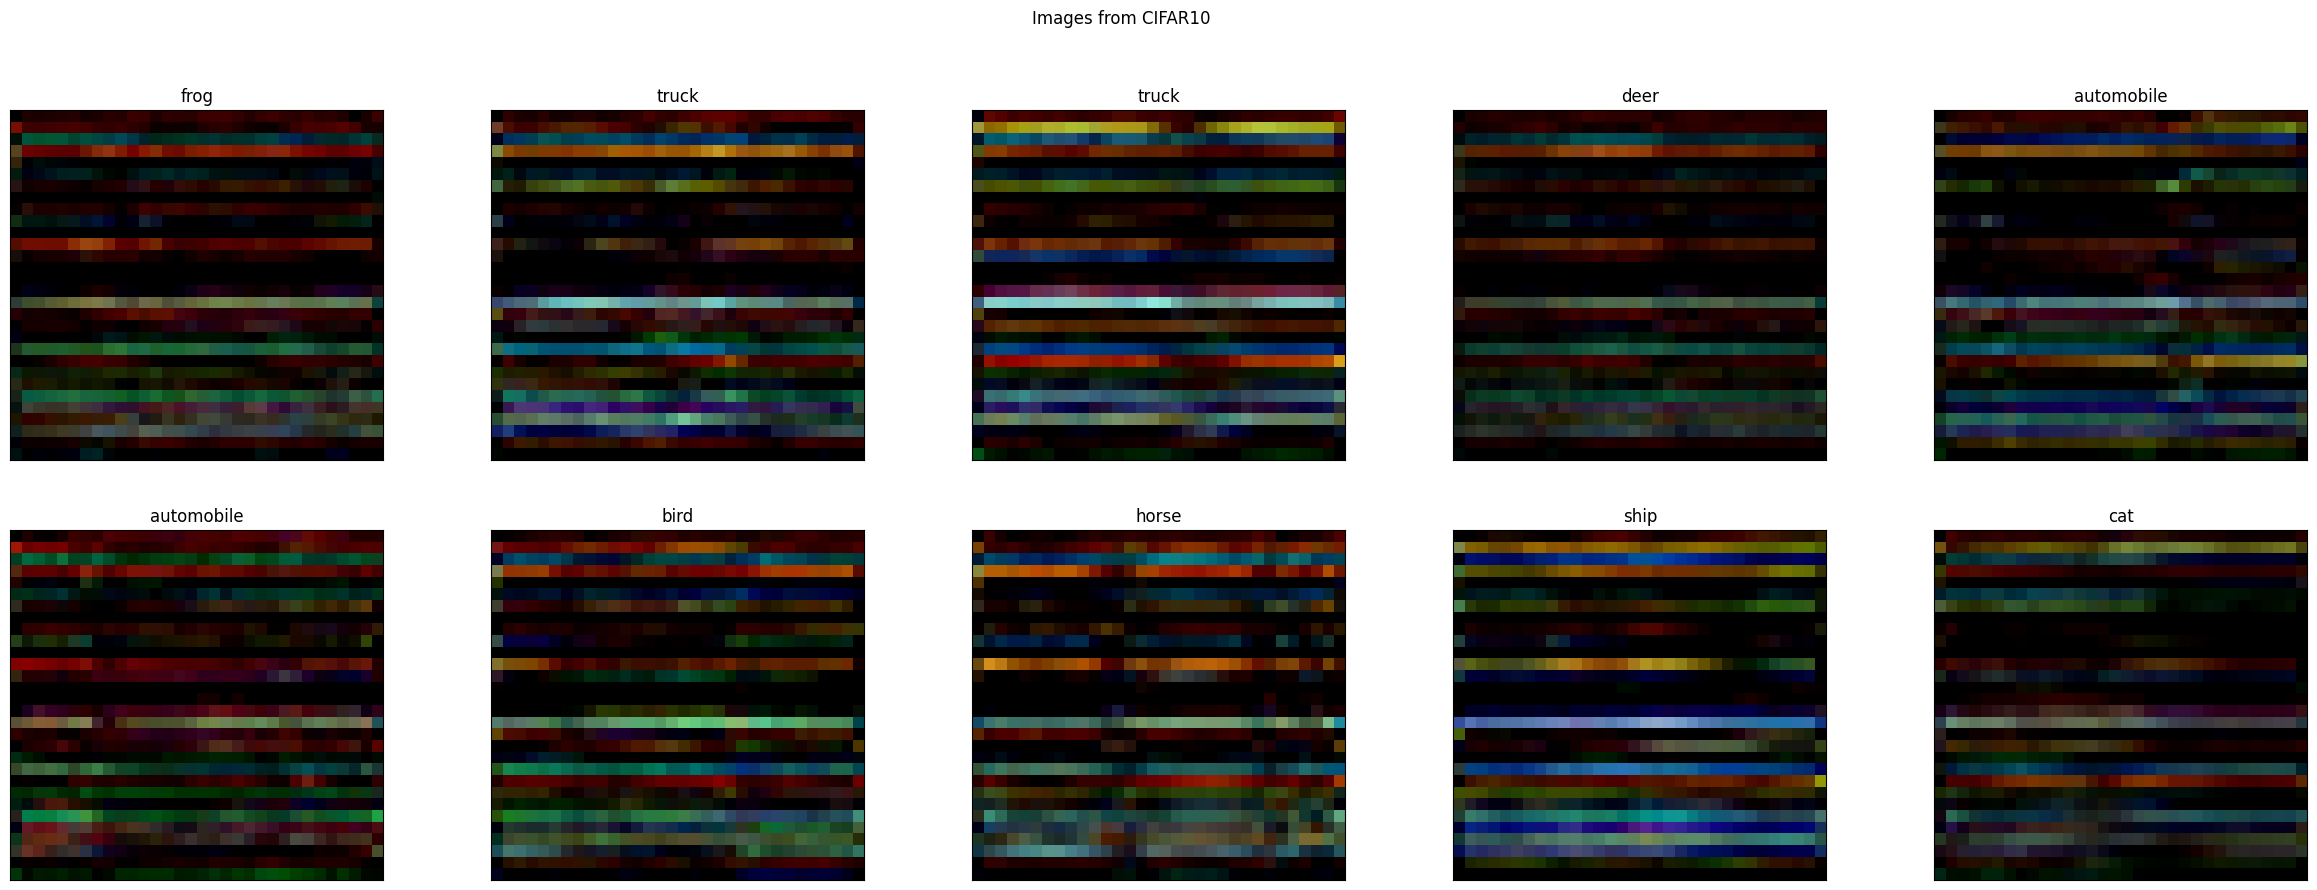

In [12]:
conv_layer = torch.nn.Conv2d(
    in_channels=32,
    out_channels=30,
    kernel_size=3,
    padding=1,
    padding_mode='zeros',
    stride=1,
    dilation=1
)
train = conv_layer(x_train)
train = train.detach().numpy()

fig, ax = plt.subplots(h, w, figsize=(30, 10))
fig.suptitle('Images from CIFAR10')

for index, (x, y) in enumerate(zip(train, y_train)):
    if index >= h * w:
        break
    
    plt.subplot(h, w, index + 1)
    plt.imshow(x)
    plt.xticks([])  # Remove coordinates from axes
    plt.yticks([])
    plt.title(classes[y])
plt.show();

### Residual connection

In [13]:
conv_layer_2 = torch.nn.Conv2d(
    in_channels=10,  # Quantity of kernels
    out_channels=10,
    kernel_size=3,
    padding=1
)

x = torch.rand(2, 10, 32, 32)
x2 = conv_layer_2(x)

h = x + x2

In [14]:
# Class ResidualBlock
class ResidualBlock(torch.nn.Module):
    def __init__(
        self,
        input_c,
        output_c,
        kernel_size,
        activation=torch.nn.ReLU):
        
        super().__init__()
        self.activation = activation()
        # To achieve tensor with same as original size
        padding_size = (kernel_size - 1) // 2
        
        self.conv = torch.nn.Conv2d(
            in_channels=input_c,
            out_channels=output_c,
            kernel_size=kernel_size,
            padding=padding_size,
            padding_mode='zeros'
        )
        
        if input_c != output_c:
            self.correct_channels = torch.nn.Conv2d(
                in_channels=input_c,
                out_channels=output_c,
                kernel_size=1
            )
        else:
            self.correct_channels = torch.nn.Identity()
            
    def forward(self, x):
        return self.activation(self.conv(x) + self.correct_channels(x))

In [15]:
ResidualBlock(3, 10, 3)

ResidualBlock(
  (activation): ReLU()
  (conv): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (correct_channels): Conv2d(3, 10, kernel_size=(1, 1), stride=(1, 1))
)

In [16]:
ResidualBlock(10, 10, 3, torch.nn.Tanh)

ResidualBlock(
  (activation): Tanh()
  (conv): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (correct_channels): Identity()
)

# Dropout

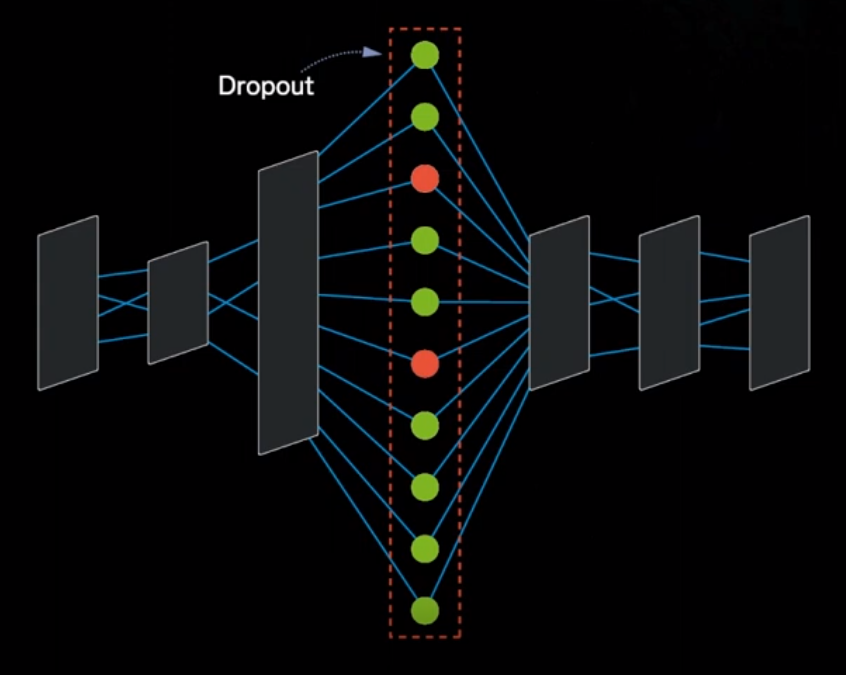

### You have to send through hidden layer more principal info using just residual neurons

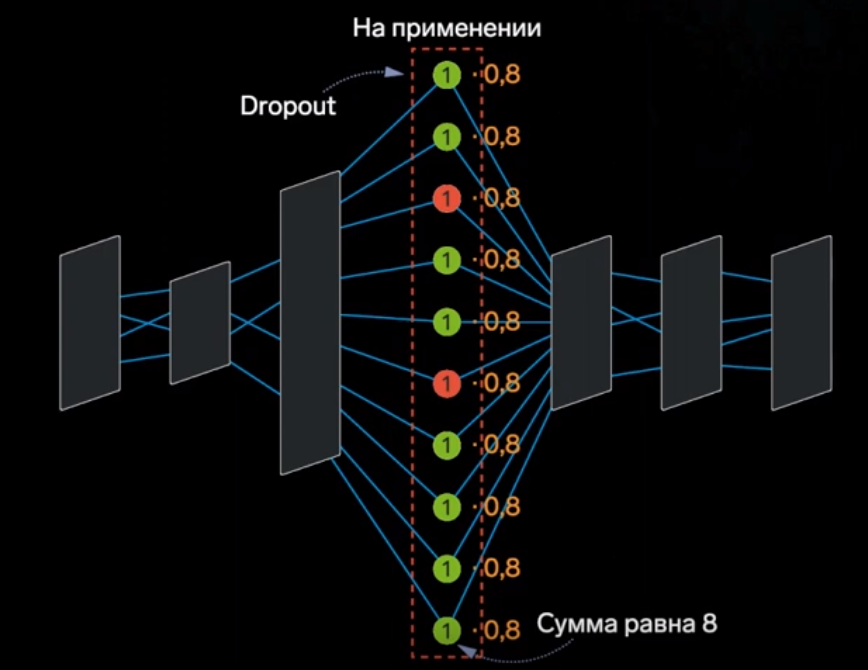

# Task 1

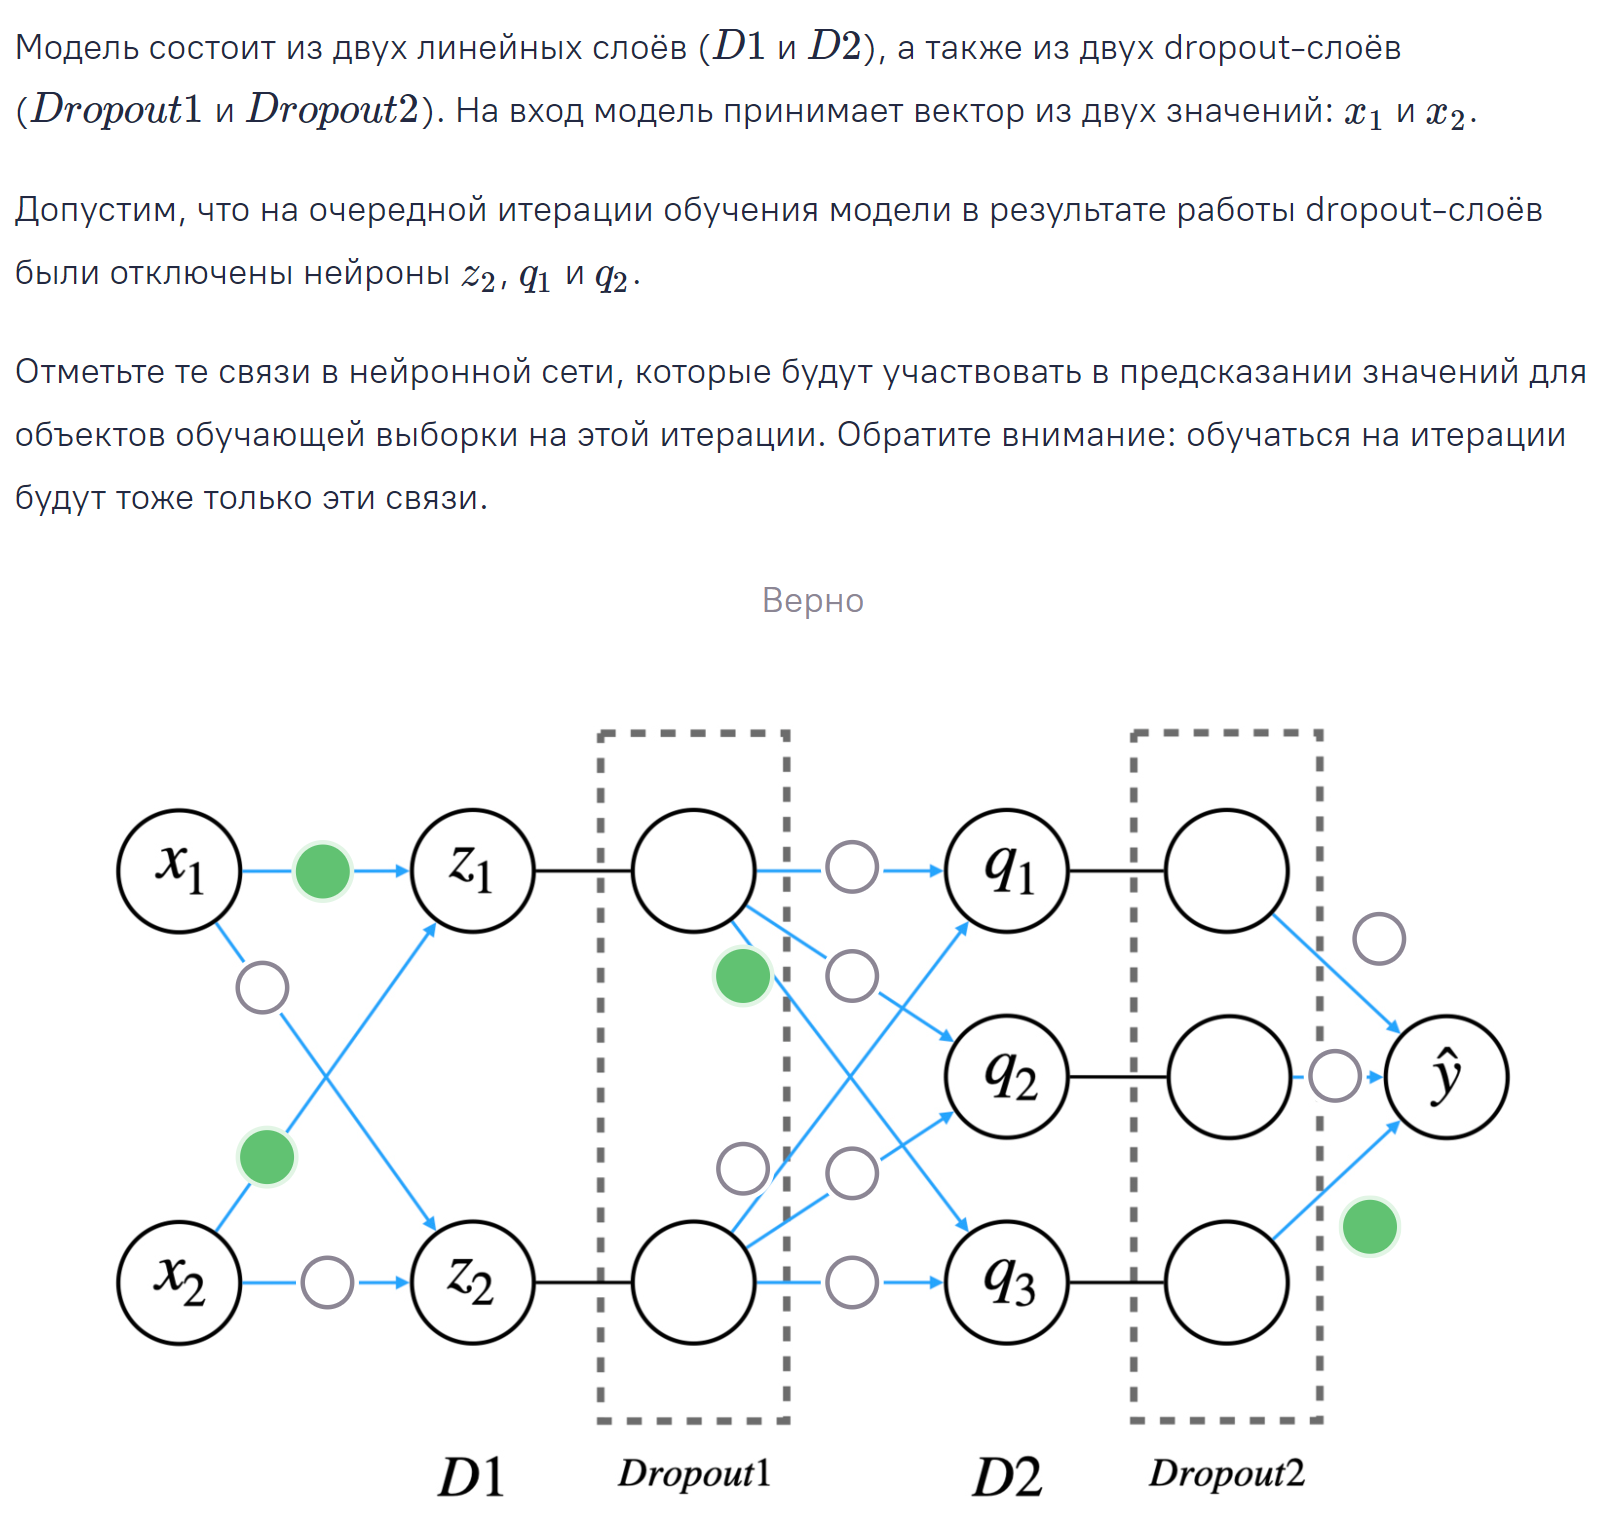

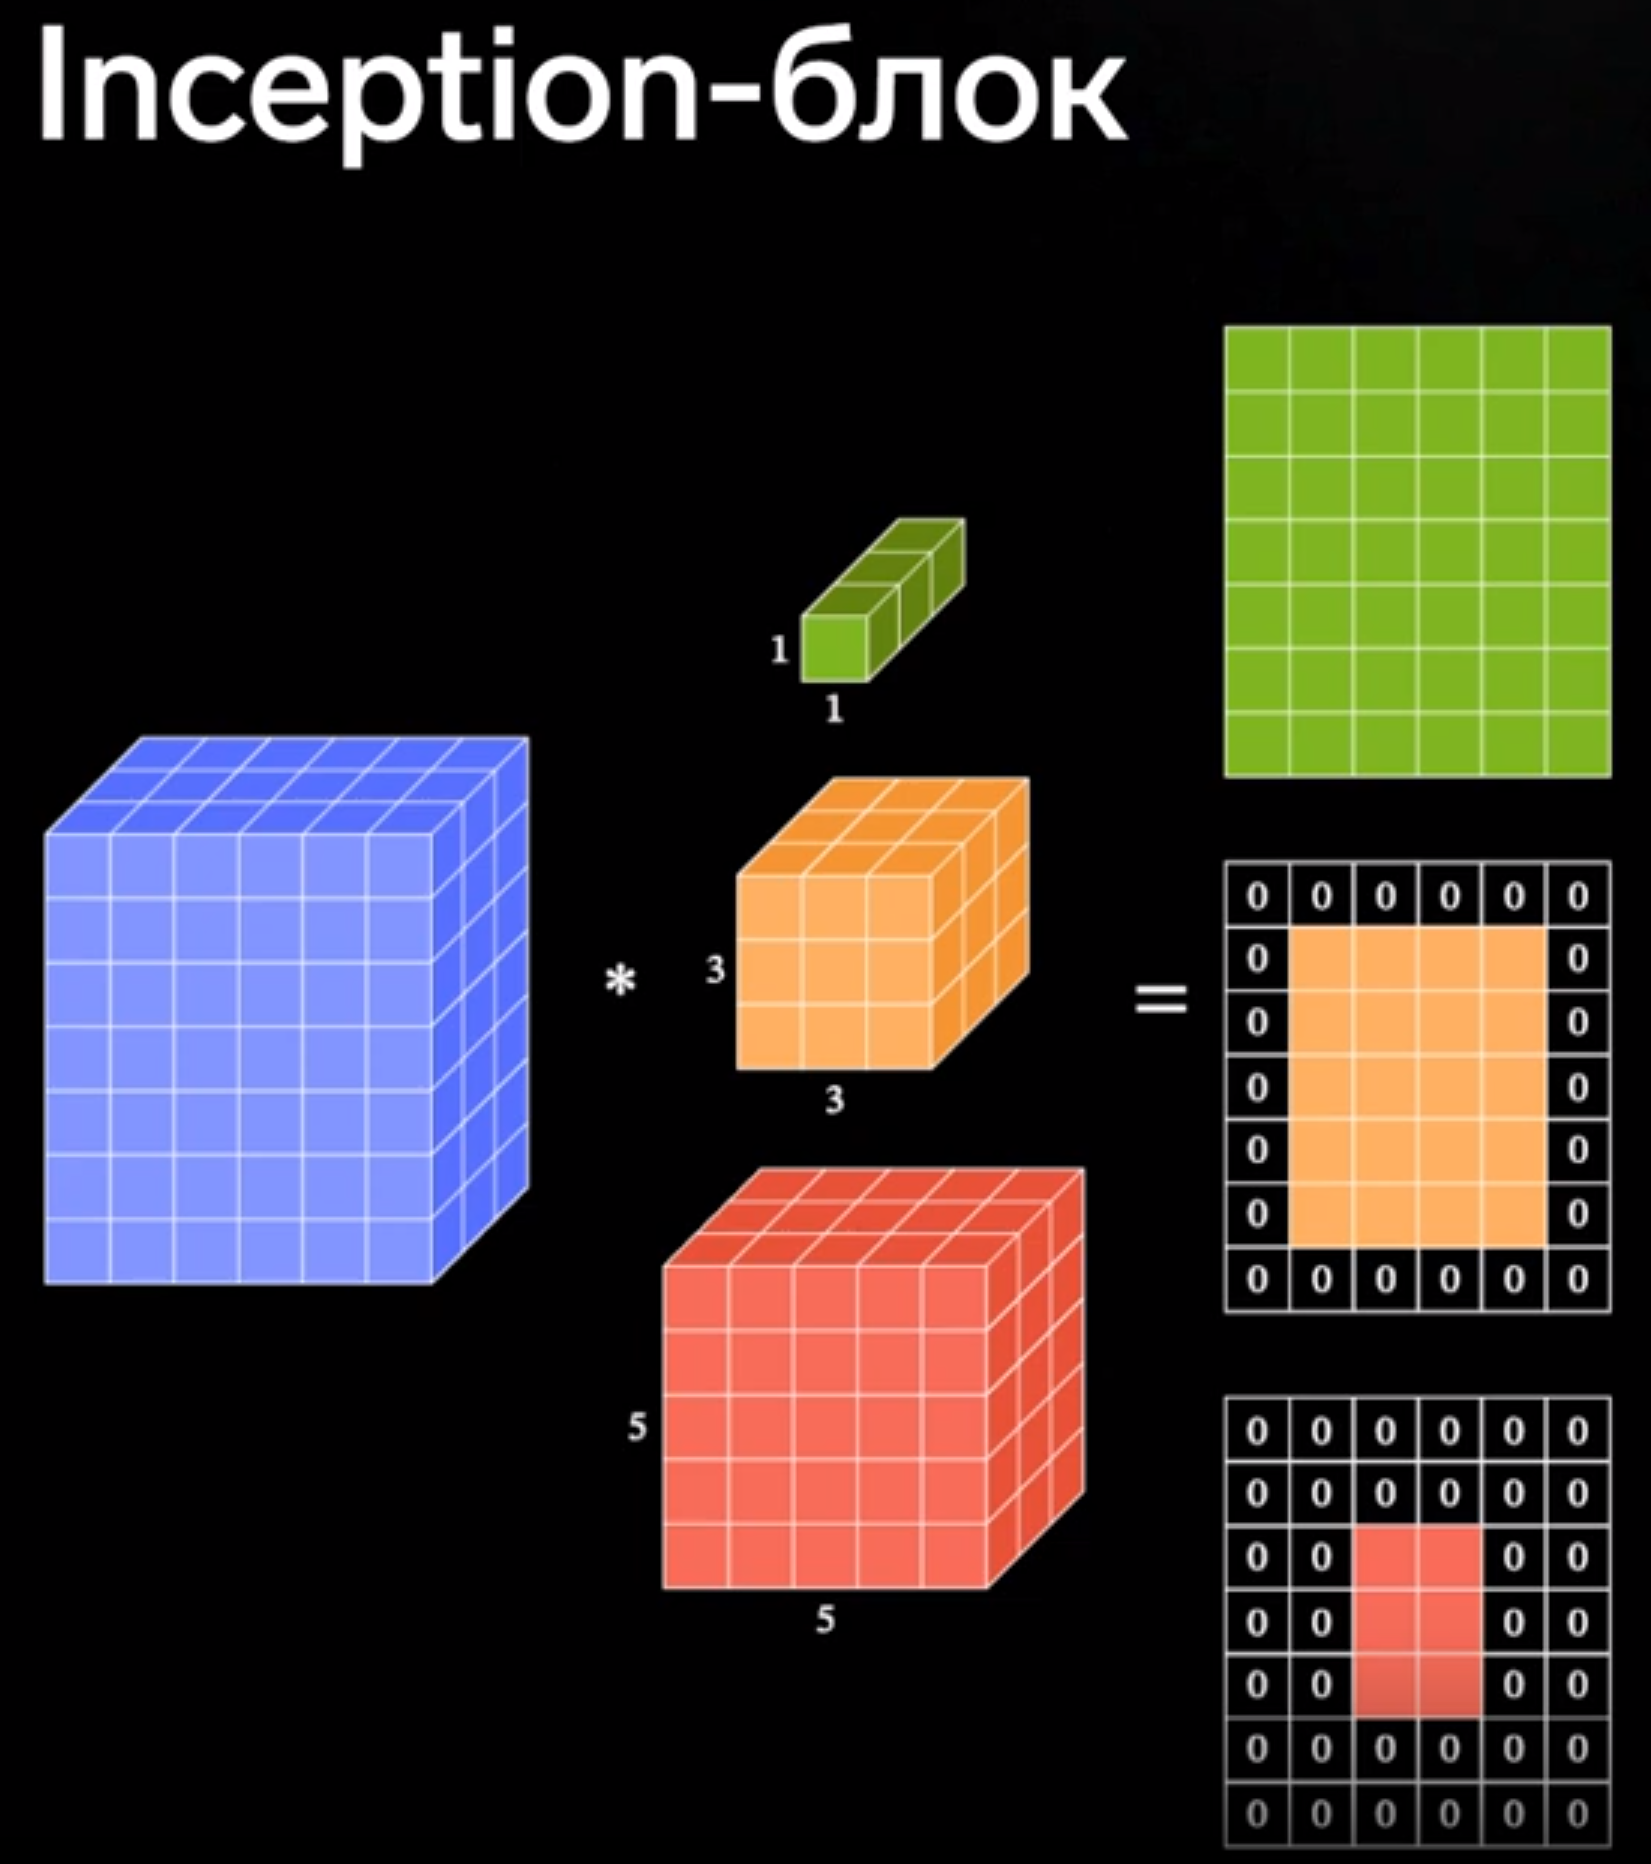

### Different Inceptions 1x1, 3x3 and 5x5 in one convolution layer

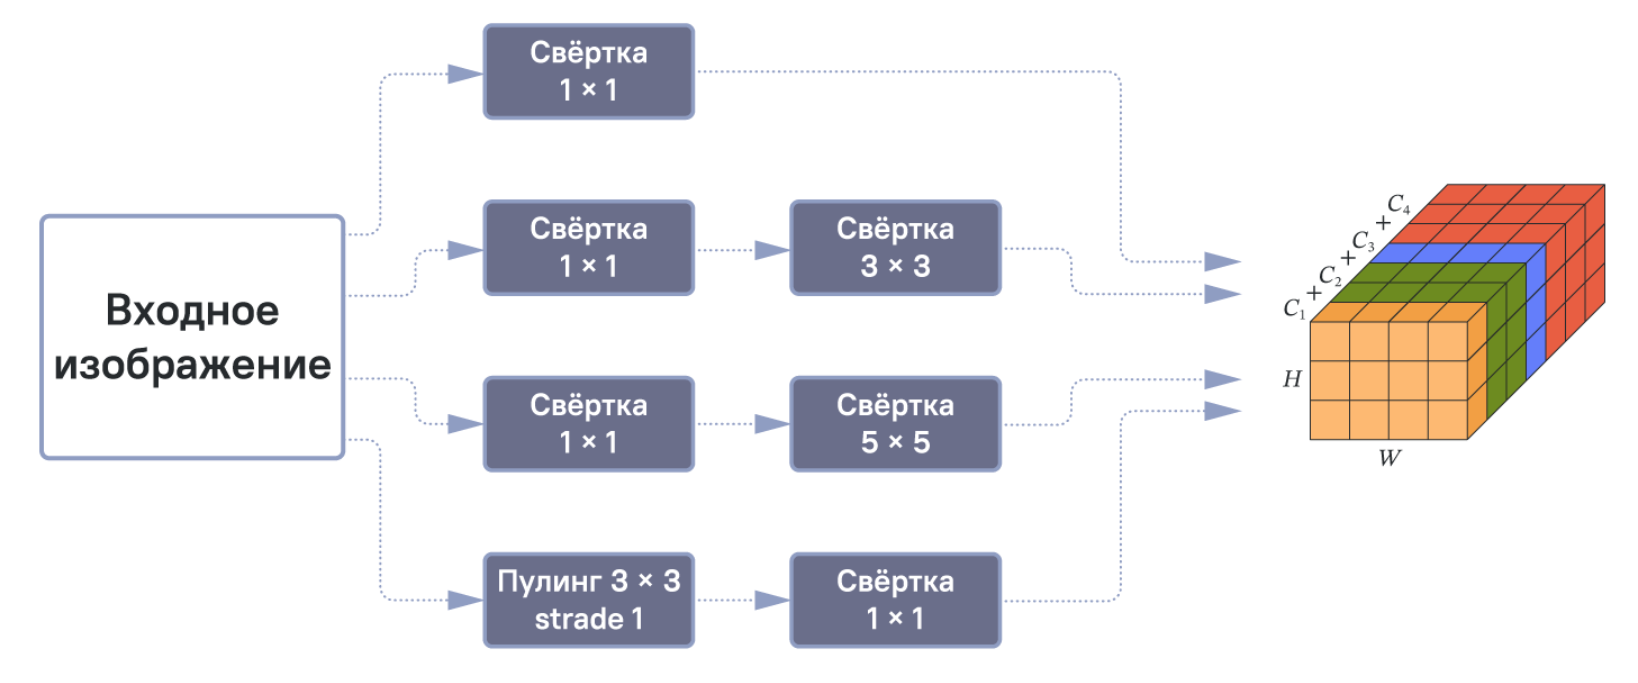

# Task 2
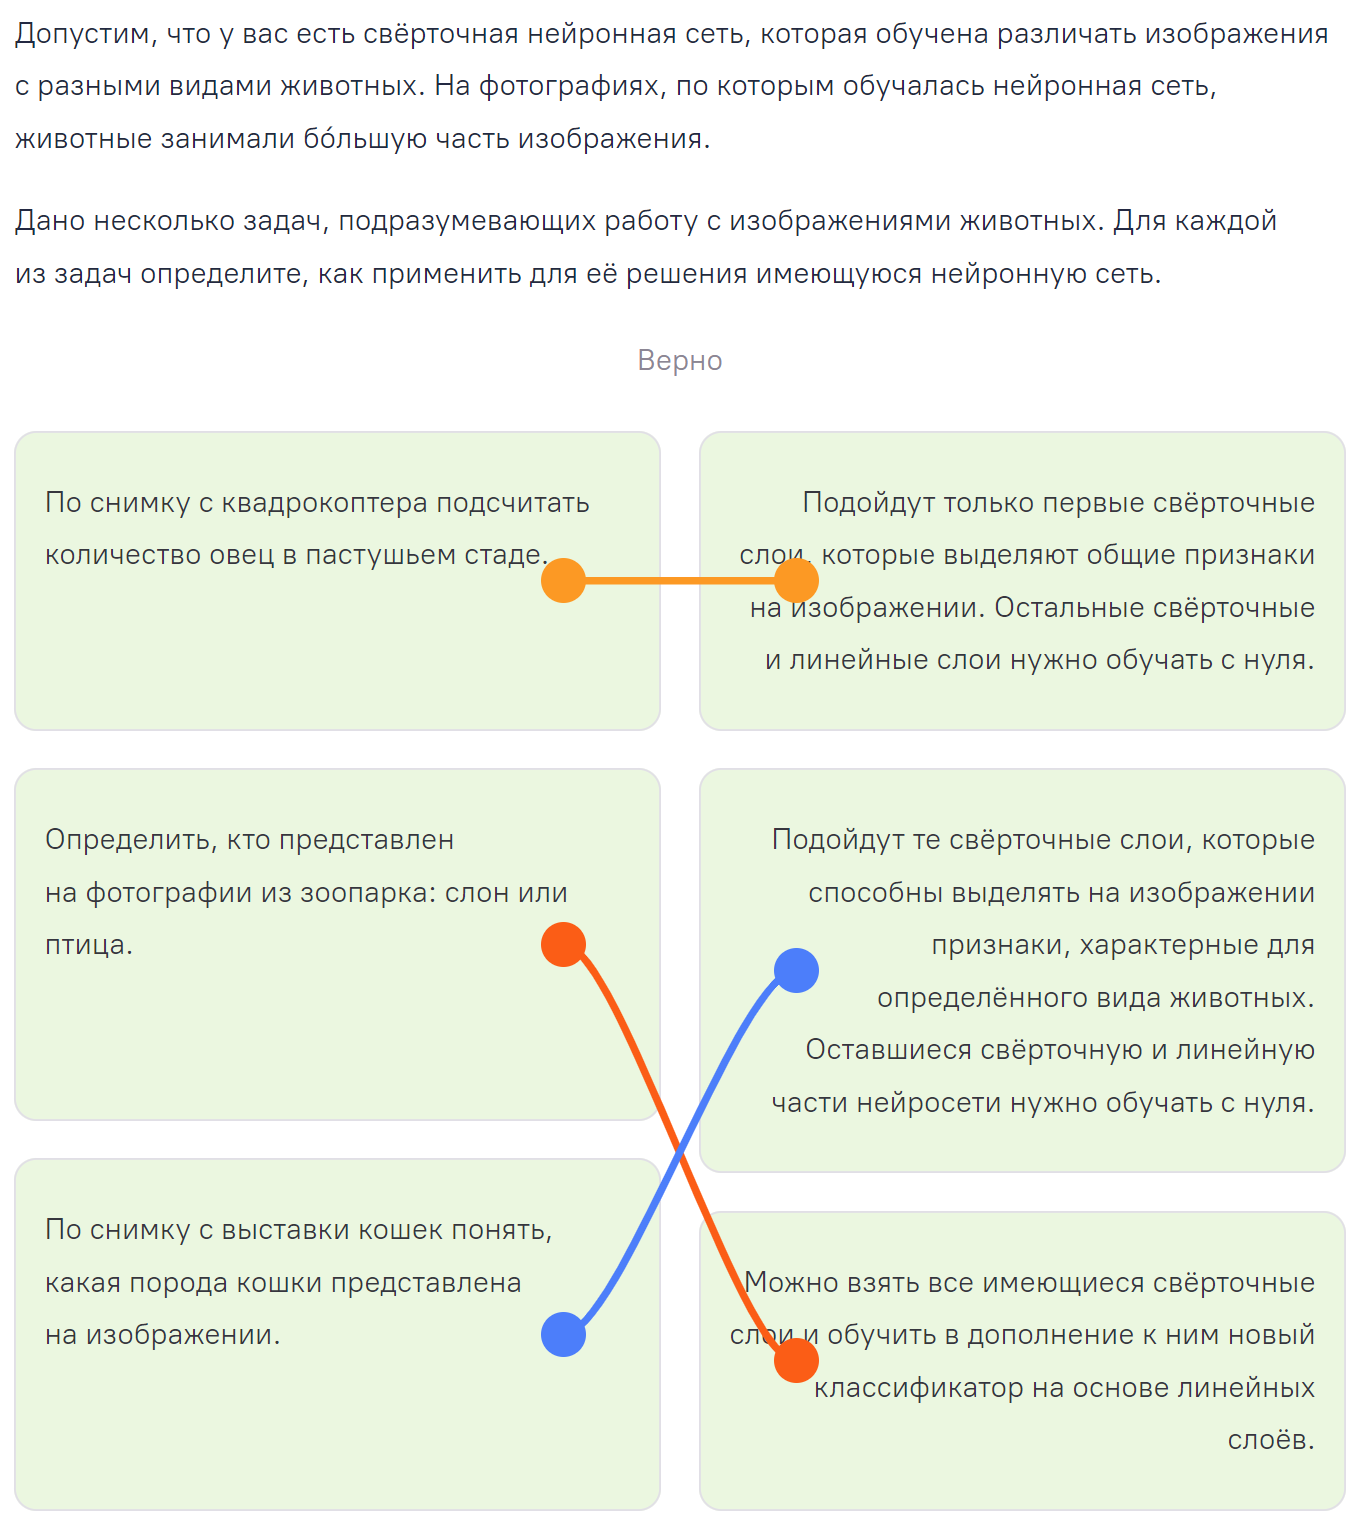

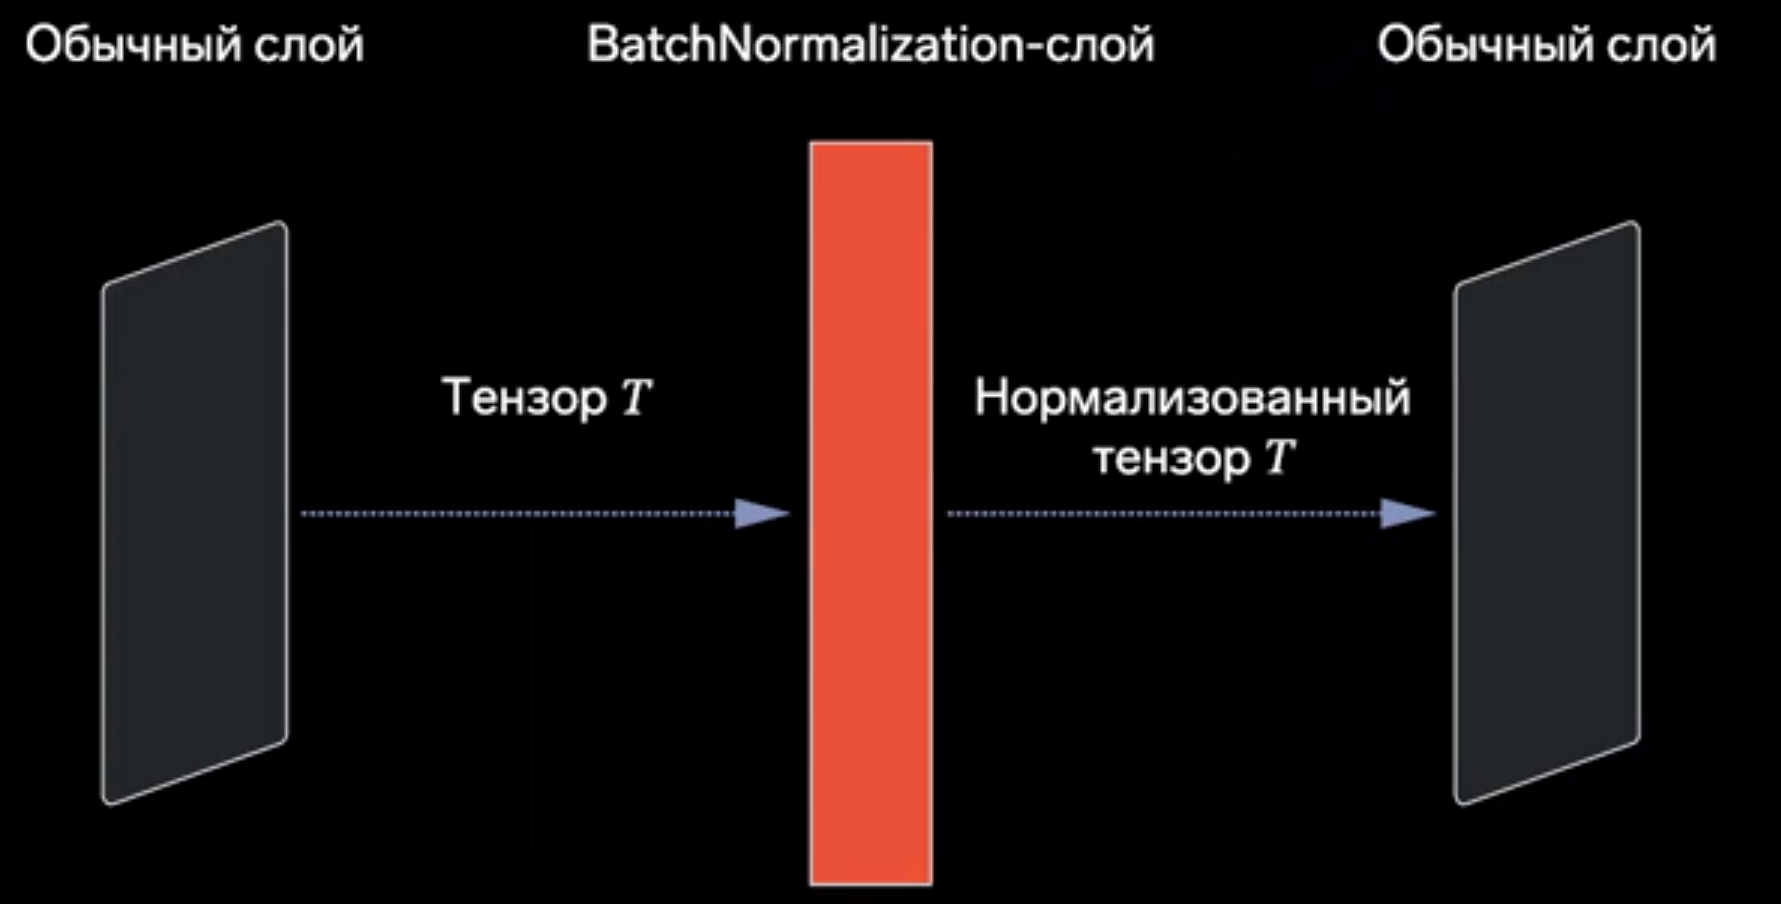

# Task 3
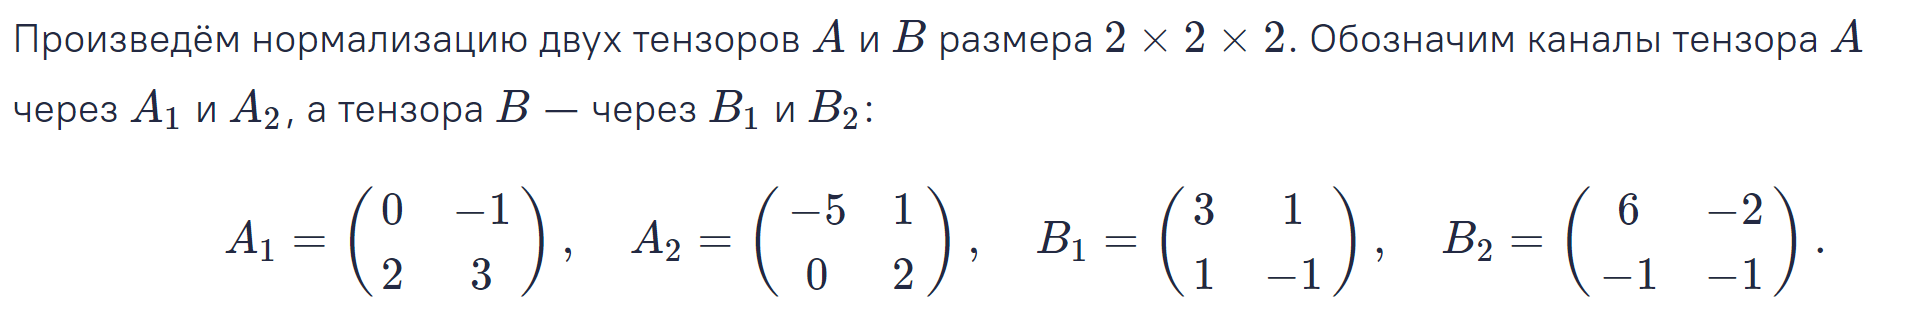

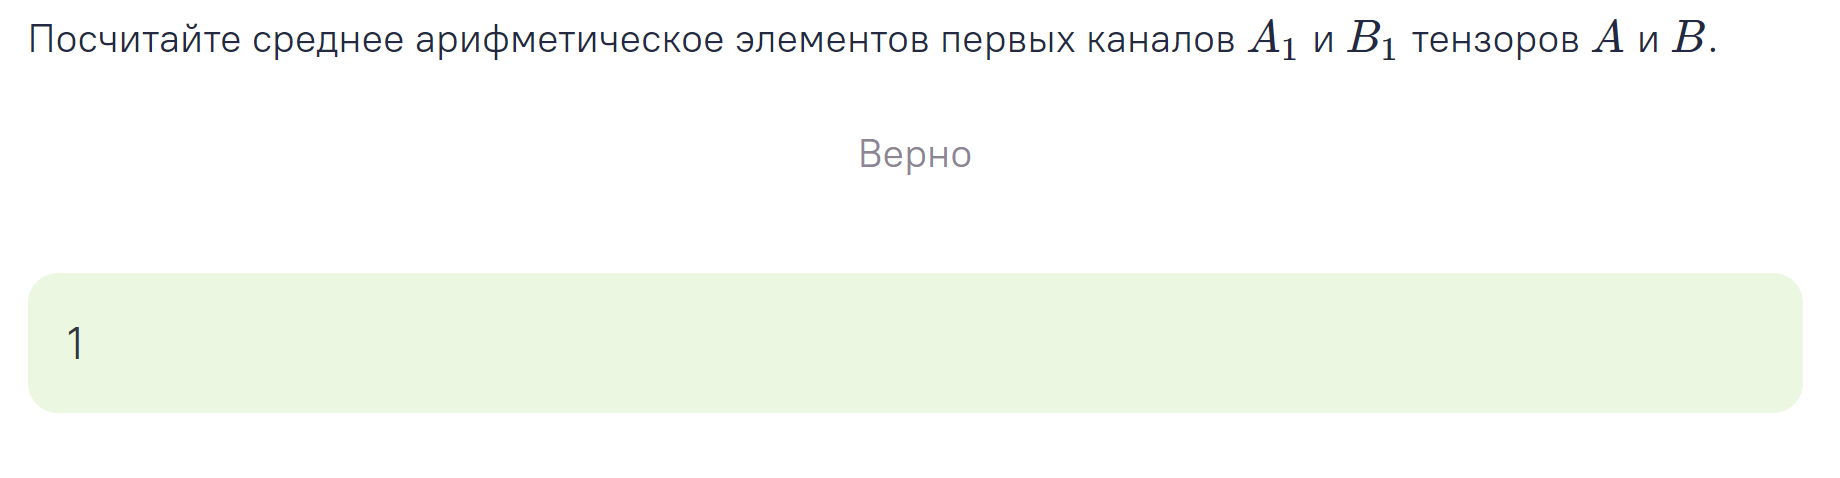

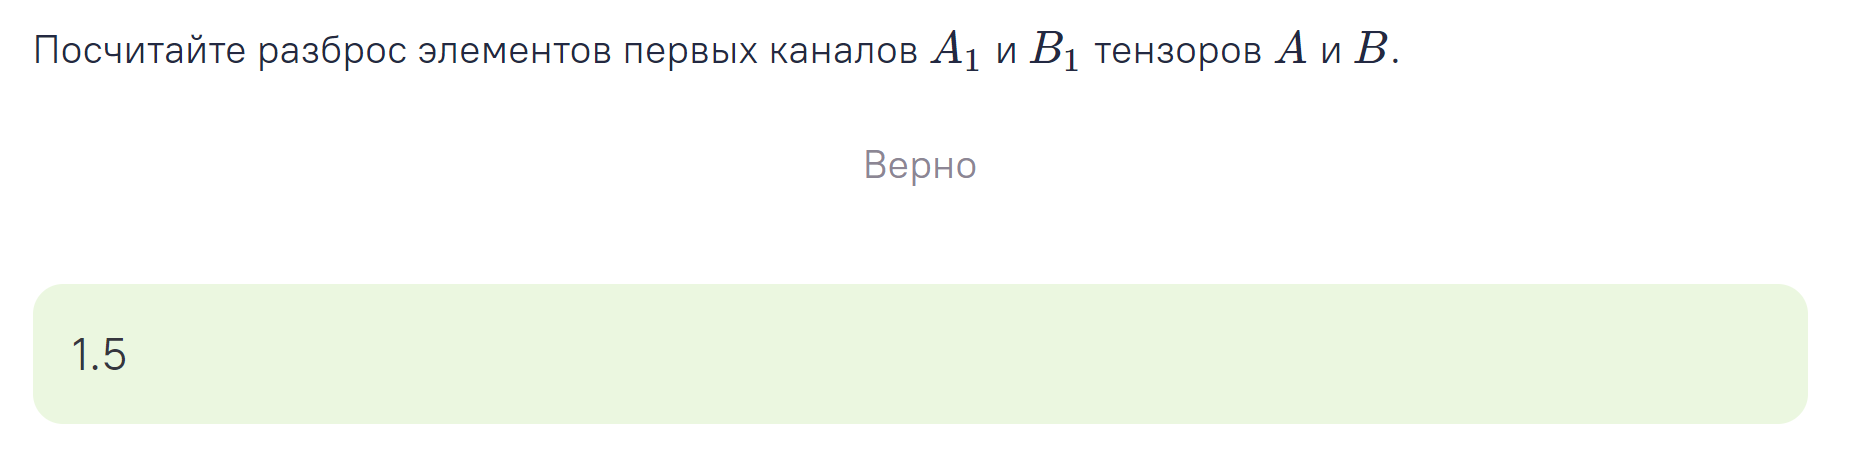
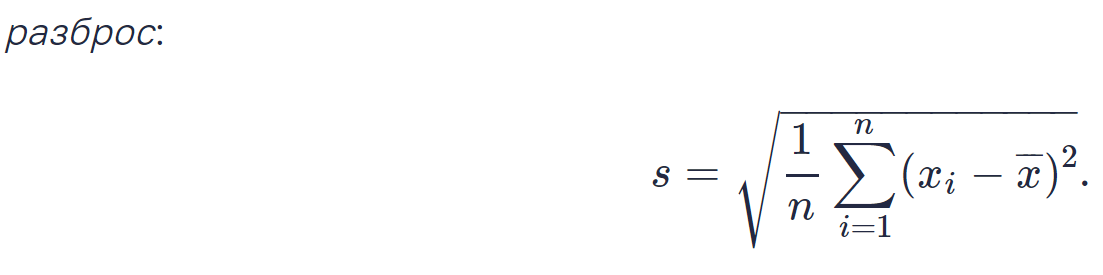

## Z-нормализация
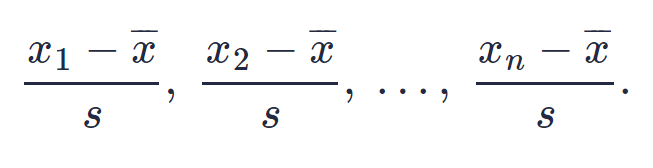

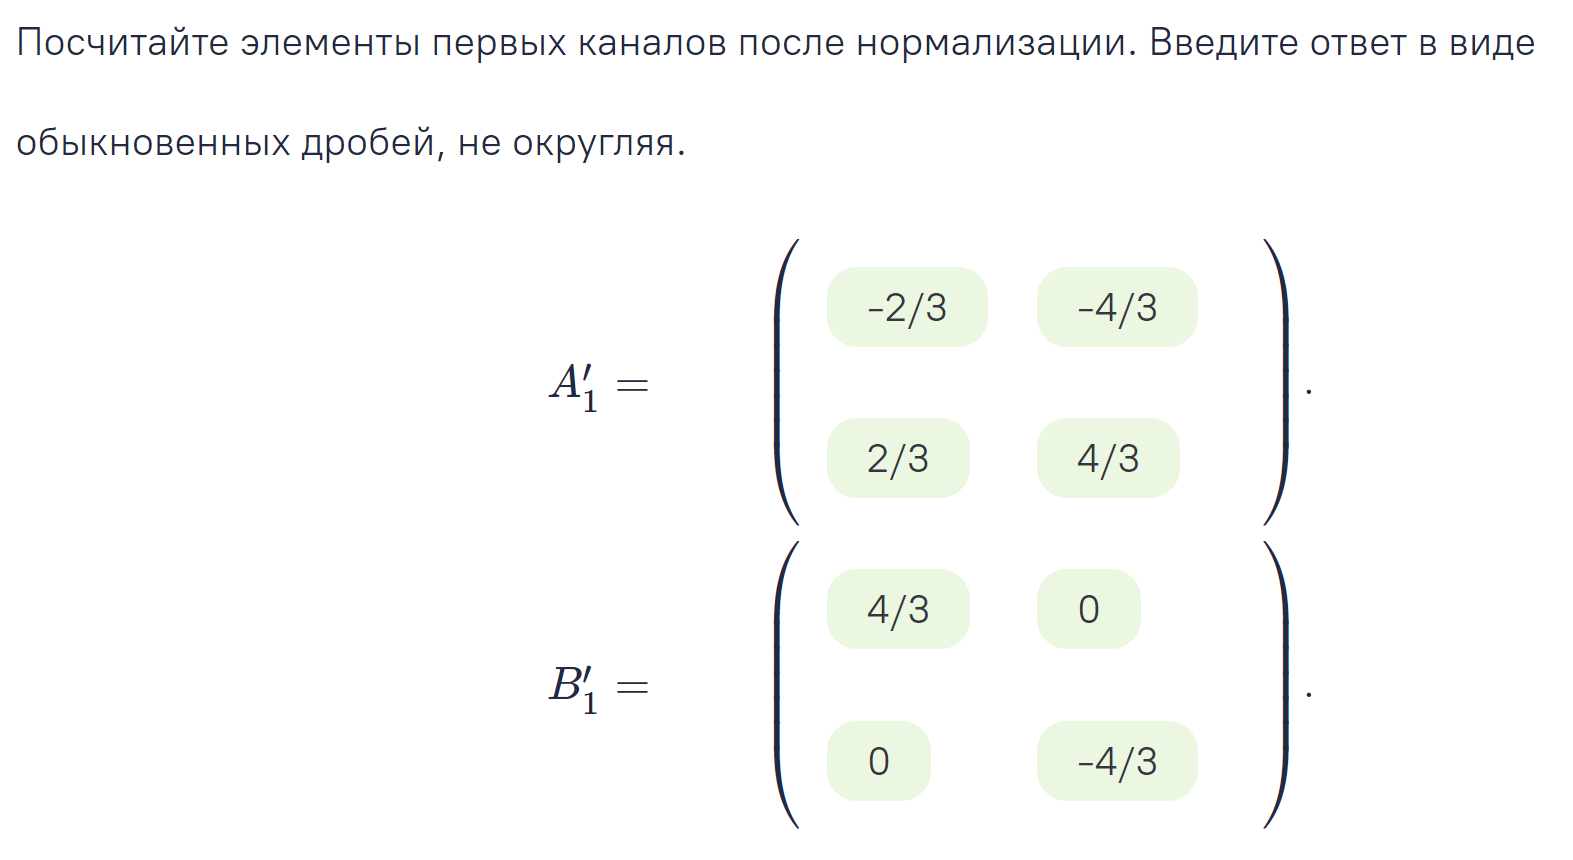

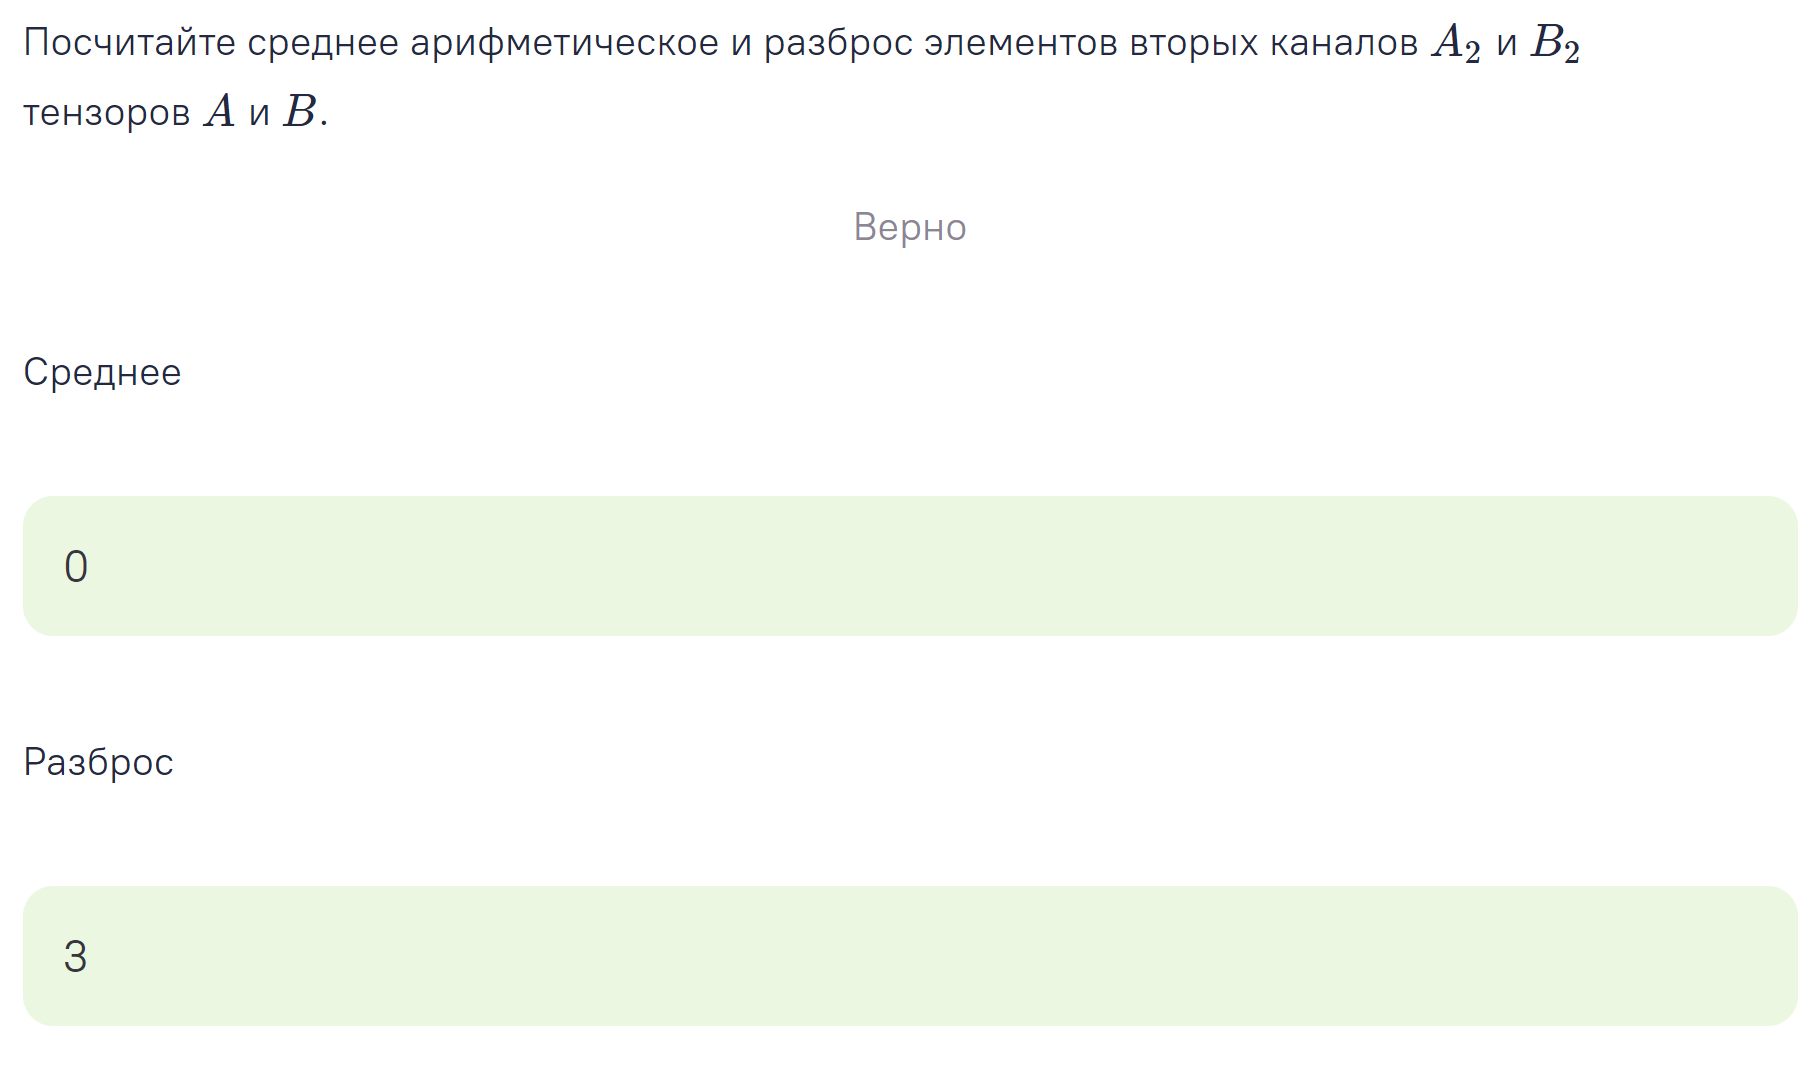

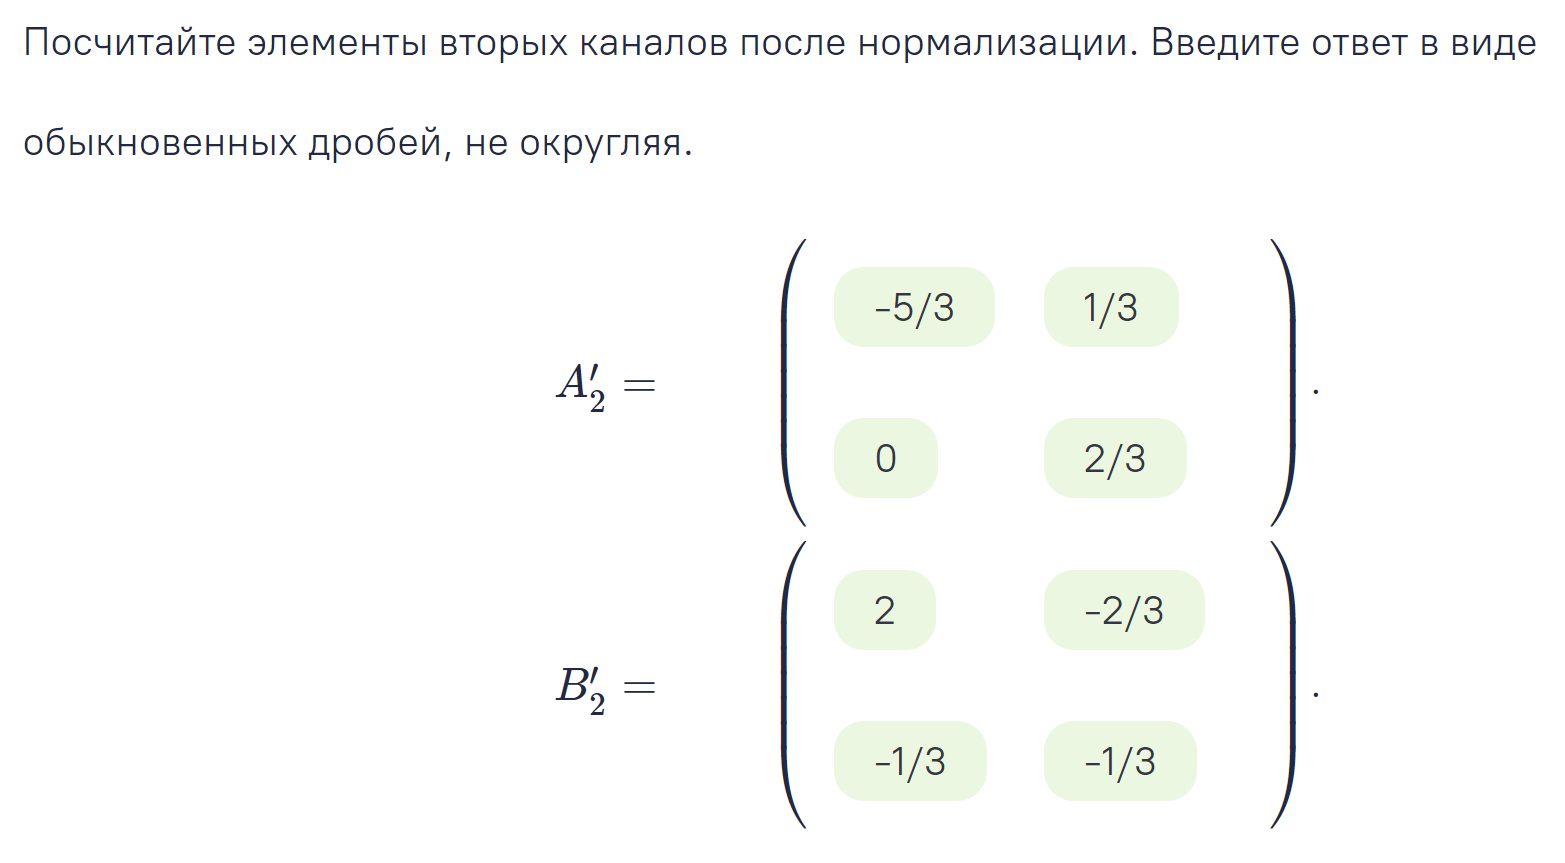

# Convolution neural nerwork in PyTorch

In [17]:
# Convolution layers
from collections import OrderedDict

conv_layers = [
    ('residual_block_1', ResidualBlock(
        input_c=3,  # Always as RGB has 3 channels
        output_c=8,
        kernel_size=3,
        activation=torch.nn.ReLU
    )),
    ('residual_block_2', ResidualBlock(
        input_c=8,
        output_c=16,
        kernel_size=3,
        activation=torch.nn.ReLU
    )),
    ('pooling', torch.nn.MaxPool2d(kernel_size=2)),
    ('residual_block_3', ResidualBlock(
        input_c=16,
        output_c=32,
        kernel_size=3,
        activation=torch.nn.ReLU
    ))
]

In [18]:
conv_model = torch.nn.Sequential(OrderedDict(conv_layers))
conv_model

Sequential(
  (residual_block_1): ResidualBlock(
    (activation): ReLU()
    (conv): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (correct_channels): Conv2d(3, 8, kernel_size=(1, 1), stride=(1, 1))
  )
  (residual_block_2): ResidualBlock(
    (activation): ReLU()
    (conv): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (correct_channels): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
  )
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (residual_block_3): ResidualBlock(
    (activation): ReLU()
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (correct_channels): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [19]:
# Linearal layers
lin_layers = [
    ('linear_1', torch.nn.Linear(
        in_features=32,
        out_features=16
    )),
    ('linear_activation_1', torch.nn.ReLU()),
    ('linear_2', torch.nn.Linear(
        in_features=16,
        out_features=10
    )),
    ('softmax_activation', torch.nn.Softmax(-1))    
]

lin_model = torch.nn.Sequential(OrderedDict(lin_layers))
lin_model

Sequential(
  (linear_1): Linear(in_features=32, out_features=16, bias=True)
  (linear_activation_1): ReLU()
  (linear_2): Linear(in_features=16, out_features=10, bias=True)
  (softmax_activation): Softmax(dim=-1)
)

### Global max pooling

In [20]:
# By examples
x = torch.rand(2, 3, 32, 32)
x = conv_model(x)
print(f'After convolutions: {x.shape}')

# Global max pooling. -1 means last dimension
x = x.max(-1).values.max(-1).values 
print(f'After global max pooling: {x.shape}')

# Linear layers classificators
x = lin_model(x)
print(f'After linear layers: {x.shape}')
x

After convolutions: torch.Size([2, 32, 16, 16])
After global max pooling: torch.Size([2, 32])
After linear layers: torch.Size([2, 10])


tensor([[0.0996, 0.0803, 0.0859, 0.0782, 0.1359, 0.0954, 0.1297, 0.0897, 0.0915,
         0.1138],
        [0.1001, 0.0797, 0.0856, 0.0779, 0.1355, 0.0960, 0.1304, 0.0902, 0.0915,
         0.1130]], grad_fn=<SoftmaxBackward0>)

In [21]:
# Same things but using general view
IMG_SIZE = 32

class ResidualModel(torch.nn.Module):
    def __init__(
        self,
        out_size,  # Number of classes
        residual_sizes,  # Three numbers: Number of residual blocks,  number of channels, and kernel size
        linear_sizes,  # List of linear layers in final classificator
        activation = torch.nn.ReLU,
        flatten = True  # Use flatten or GlobalPooling
    ):
        super().__init__()
        self.flatten = flatten
        
        # Collect all convolution layers in one block
        conv_layers = []
        current_c = 3
        for group_index, (num_residual, out_channels, kernel_size) in enumerate(residual_sizes):
            for residual_index in range(num_residual):
                conv_layers.append((  # Add residual block for each group
                    f'residual_{group_index + 1}_{residual_index + 1}',
                    ResidualBlock(
                        input_c = current_c if residual_index == 0 else out_channels,
                        output_c = out_channels, 
                        kernel_size = kernel_size,
                        activation = activation
                    )
                ))
            current_c = out_channels
            if group_index < len(residual_sizes) - 1:
                conv_layers.append((  # Add pooling if this is not last layer
                    f'pooling_{group_index + 1}',
                    torch.nn.AvgPool2d(2)
                ))
                
        self.conv_part = torch.nn.Sequential(OrderedDict(conv_layers))
        
        # Collect all linear layers in second block
        out_c = residual_sizes[-1][1]
        final_size = IMG_SIZE // 2 ** (len(residual_sizes) - 1)
        clf_in_size = (out_c * final_size**2) if flatten else out_c
        
        linear_sizes = [clf_in_size, *linear_sizes, out_size]
        
        clf_layers = []
        
        for i, (from_size, to_size) in enumerate(zip(linear_sizes[:-1], linear_sizes[1:])):
            clf_layers.append((f"linear_{i}", torch.nn.Linear(from_size, to_size)))
            if i < len(linear_sizes) - 2:
                clf_layers.append((f"act_{i}", activation()))
            else:
                clf_layers.append(("log_softmax", torch.nn.LogSoftmax(-1)))
                
        self.clf_part = torch.nn.Sequential(OrderedDict(clf_layers))
    
    def forward(self, x):  # input (bs x h x w x c_in)
        x = x.permute((0, 3, 1, 2))  # (bs x c_in x h x w)
        
        x = self.conv_part(x)  # bs x c_out x h' x w'
        
        if self.flatten:
            # Flatten
            x = x.reshape(x.shape[0], -1)  # bs x (c_out * h' * w')
        else:
            # GlobalMaxPooling
            x = x.max(-1).values.max(-1).values  # bs x c_out

        
        x = self.clf_part(x)  # bs x 10
        
        return x 

In [22]:
def print_num_params(model):
    # We count the total number of trainable weights in the model
    sum_params_size = 0
    for name, param in model.named_parameters():
        param_size = param.numel()
        print("{:<46} ~ {:<14} ~ {}".format(name, str(list(param.shape)), param_size))
        sum_params_size += param_size
    print(f"Total number of parameters ~ {sum_params_size}")


model = ResidualModel(
    out_size=10,
    residual_sizes=[(2, 8, 3), (2, 16, 3), (2, 32, 3), (2, 32, 3)],
    linear_sizes=[32],
    activation=torch.nn.ReLU,
    flatten=True,
)

model

ResidualModel(
  (conv_part): Sequential(
    (residual_1_1): ResidualBlock(
      (activation): ReLU()
      (conv): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (correct_channels): Conv2d(3, 8, kernel_size=(1, 1), stride=(1, 1))
    )
    (residual_1_2): ResidualBlock(
      (activation): ReLU()
      (conv): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (correct_channels): Identity()
    )
    (pooling_1): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (residual_2_1): ResidualBlock(
      (activation): ReLU()
      (conv): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (correct_channels): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
    )
    (residual_2_2): ResidualBlock(
      (activation): ReLU()
      (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (correct_channels): Identity()
    )
    (pooling_2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (residual_3_1): Re

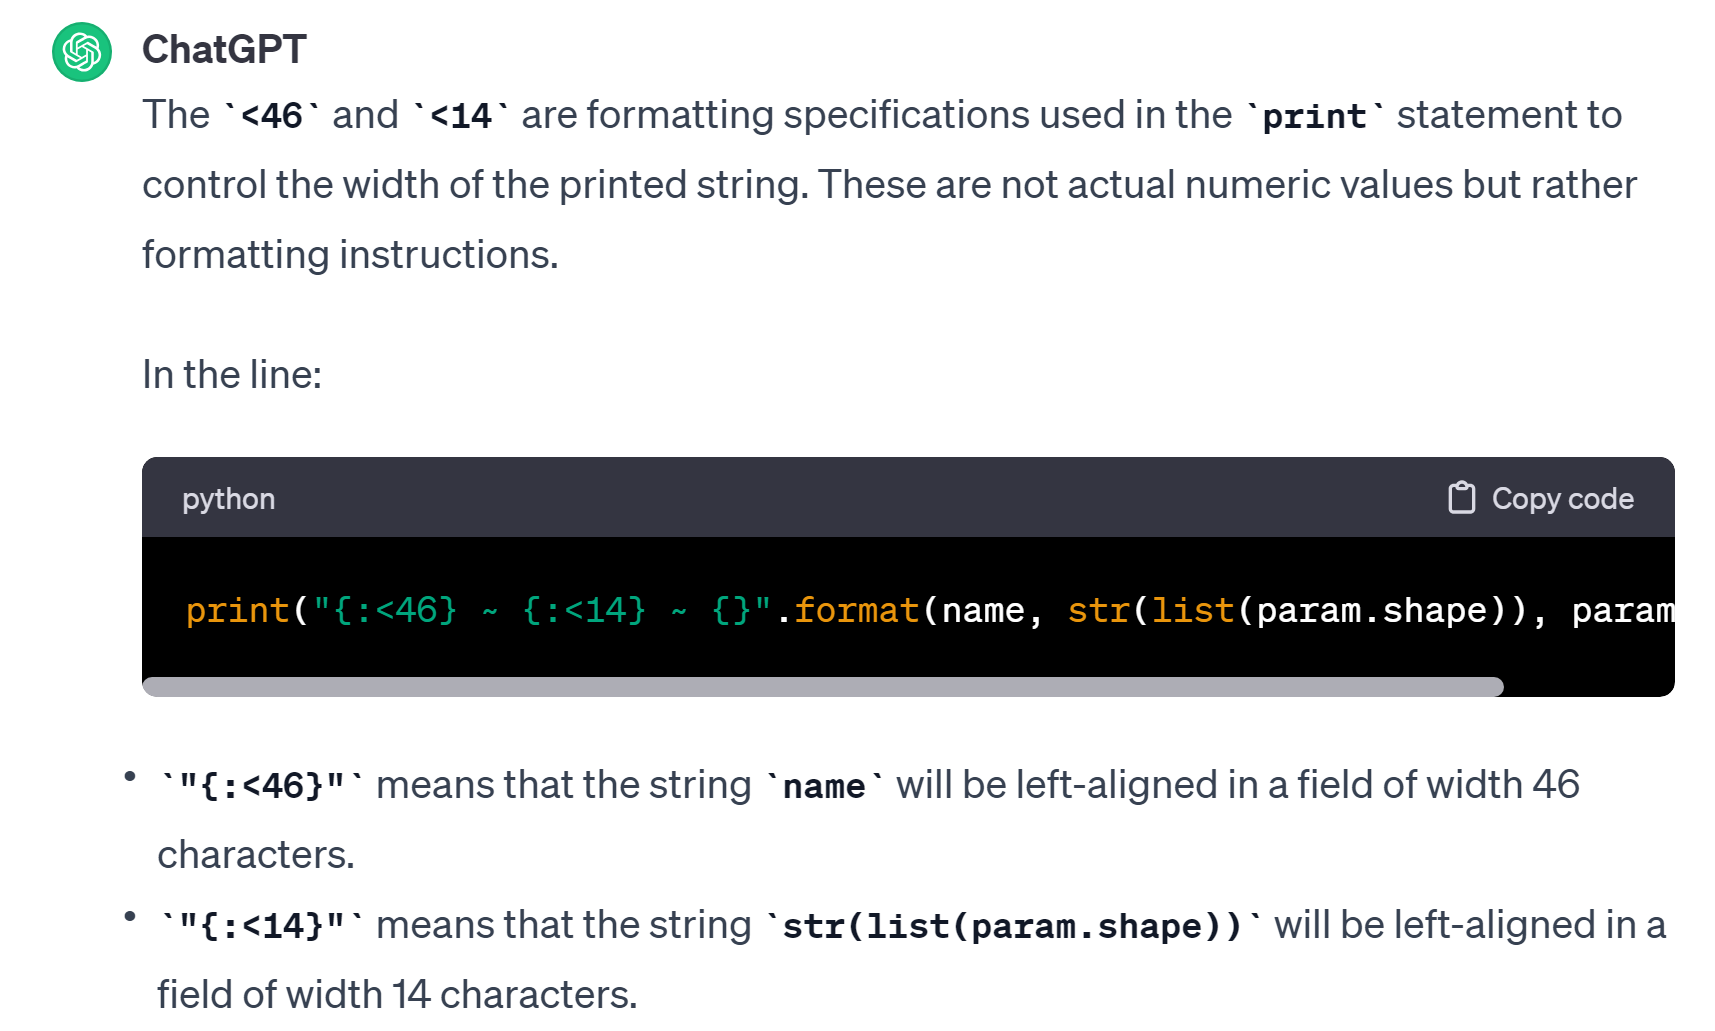

In [23]:
# How many weights if we have choisen flatter
print_num_params(model)

conv_part.residual_1_1.conv.weight             ~ [8, 3, 3, 3]   ~ 216
conv_part.residual_1_1.conv.bias               ~ [8]            ~ 8
conv_part.residual_1_1.correct_channels.weight ~ [8, 3, 1, 1]   ~ 24
conv_part.residual_1_1.correct_channels.bias   ~ [8]            ~ 8
conv_part.residual_1_2.conv.weight             ~ [8, 8, 3, 3]   ~ 576
conv_part.residual_1_2.conv.bias               ~ [8]            ~ 8
conv_part.residual_2_1.conv.weight             ~ [16, 8, 3, 3]  ~ 1152
conv_part.residual_2_1.conv.bias               ~ [16]           ~ 16
conv_part.residual_2_1.correct_channels.weight ~ [16, 8, 1, 1]  ~ 128
conv_part.residual_2_1.correct_channels.bias   ~ [16]           ~ 16
conv_part.residual_2_2.conv.weight             ~ [16, 16, 3, 3] ~ 2304
conv_part.residual_2_2.conv.bias               ~ [16]           ~ 16
conv_part.residual_3_1.conv.weight             ~ [32, 16, 3, 3] ~ 4608
conv_part.residual_3_1.conv.bias               ~ [32]           ~ 32
conv_part.residual_3_1.corre

In [24]:
# Now we replace Flatten to GlobalMaxPooling
model = ResidualModel(
    out_size=10,
    residual_sizes=[(2, 8, 3), (2, 16, 3), (2, 32, 3), (2, 32, 3)],
    linear_sizes=[32],
    activation=torch.nn.ReLU,
    flatten=False,
)

model

ResidualModel(
  (conv_part): Sequential(
    (residual_1_1): ResidualBlock(
      (activation): ReLU()
      (conv): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (correct_channels): Conv2d(3, 8, kernel_size=(1, 1), stride=(1, 1))
    )
    (residual_1_2): ResidualBlock(
      (activation): ReLU()
      (conv): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (correct_channels): Identity()
    )
    (pooling_1): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (residual_2_1): ResidualBlock(
      (activation): ReLU()
      (conv): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (correct_channels): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
    )
    (residual_2_2): ResidualBlock(
      (activation): ReLU()
      (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (correct_channels): Identity()
    )
    (pooling_2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (residual_3_1): Re

In [25]:
x = torch.rand(12, 32, 32, 3)
print(model(x).shape)
print_num_params(model)

torch.Size([12, 10])
conv_part.residual_1_1.conv.weight             ~ [8, 3, 3, 3]   ~ 216
conv_part.residual_1_1.conv.bias               ~ [8]            ~ 8
conv_part.residual_1_1.correct_channels.weight ~ [8, 3, 1, 1]   ~ 24
conv_part.residual_1_1.correct_channels.bias   ~ [8]            ~ 8
conv_part.residual_1_2.conv.weight             ~ [8, 8, 3, 3]   ~ 576
conv_part.residual_1_2.conv.bias               ~ [8]            ~ 8
conv_part.residual_2_1.conv.weight             ~ [16, 8, 3, 3]  ~ 1152
conv_part.residual_2_1.conv.bias               ~ [16]           ~ 16
conv_part.residual_2_1.correct_channels.weight ~ [16, 8, 1, 1]  ~ 128
conv_part.residual_2_1.correct_channels.bias   ~ [16]           ~ 16
conv_part.residual_2_2.conv.weight             ~ [16, 16, 3, 3] ~ 2304
conv_part.residual_2_2.conv.bias               ~ [16]           ~ 16
conv_part.residual_3_1.conv.weight             ~ [32, 16, 3, 3] ~ 4608
conv_part.residual_3_1.conv.bias               ~ [32]           ~ 32
conv_pa

# Task 4
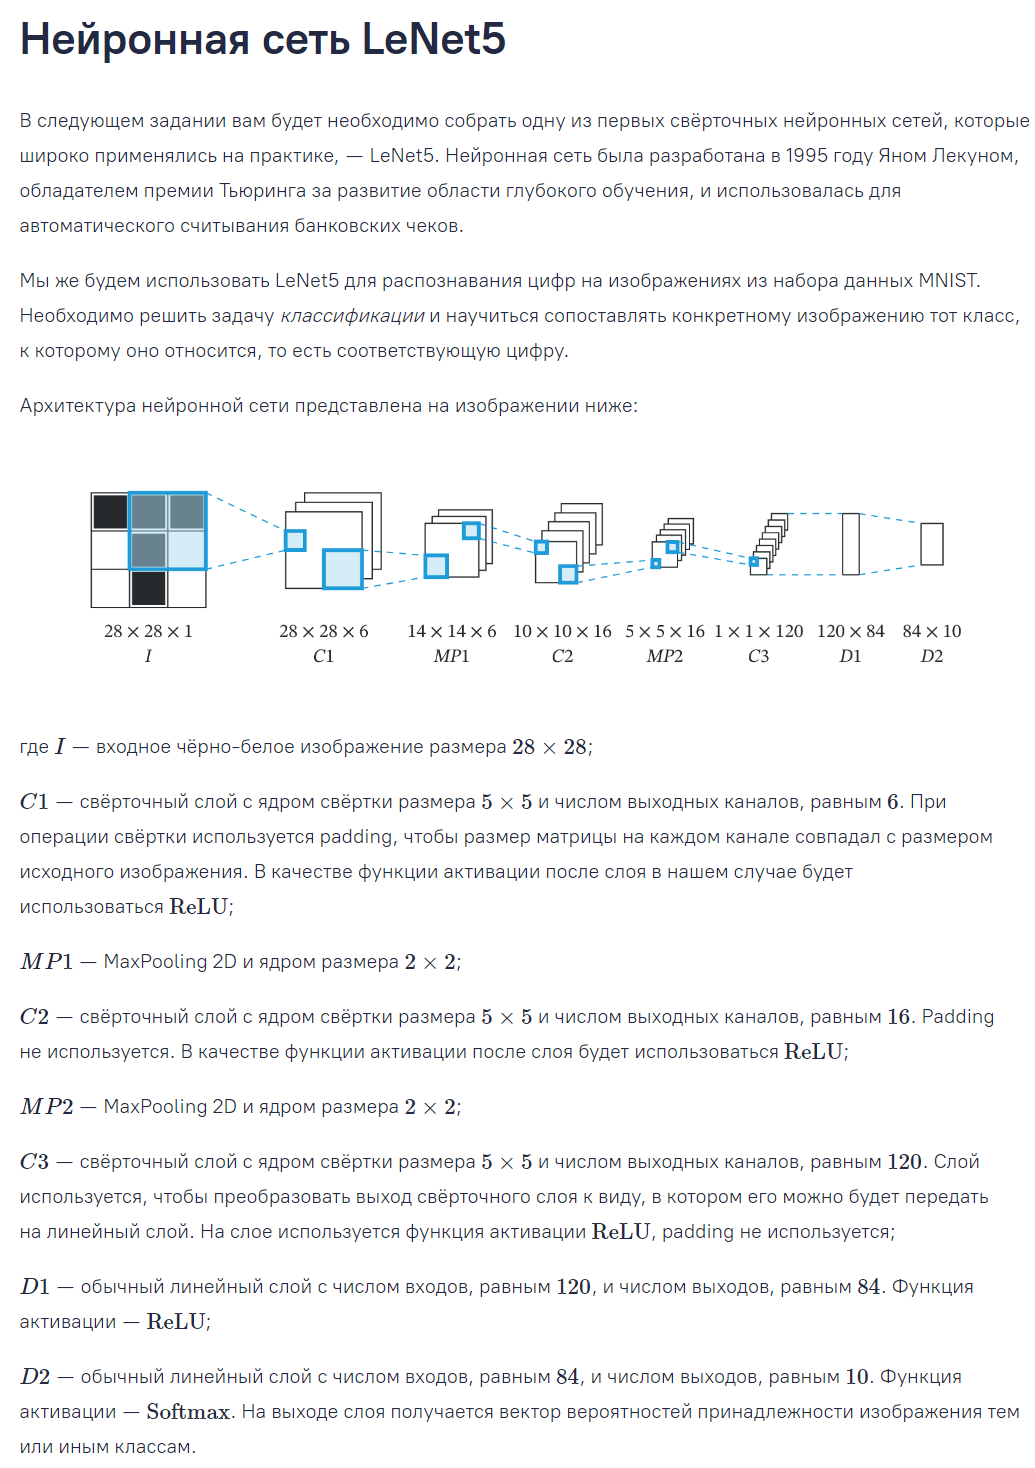

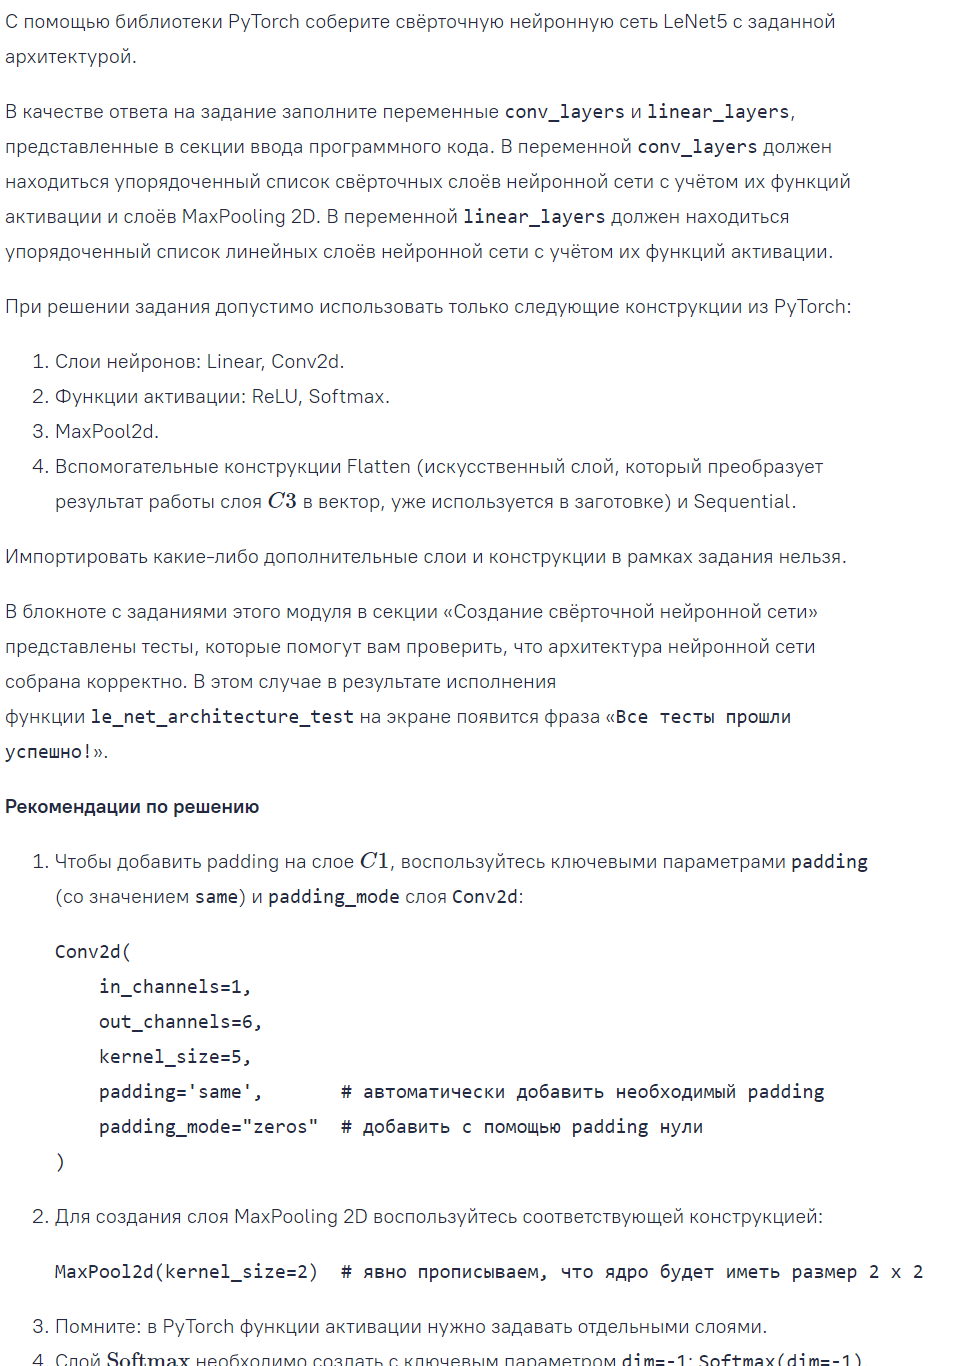

In [26]:
from torch.nn import Linear, Conv2d, ReLU, Softmax, MaxPool2d, Flatten, Sequential


conv_layers = [
    Conv2d(
        in_channels=1,
        out_channels=6,
        kernel_size=5,
        padding='same',  # automatically add padding
        padding_mode='zeros'
    ),
    ReLU(),
    MaxPool2d(kernel_size=2),
    
    Conv2d(
        in_channels=6,
        out_channels=16,
        kernel_size=5
    ),
    ReLU(),
    MaxPool2d(kernel_size=2),
    
    Conv2d(
        in_channels=16,
        out_channels=120,
        kernel_size=5,
    ),
    ReLU()
]

linear_layers = [
    Linear(
        in_features=120,
        out_features=84
    ),
    ReLU(),
    
    Linear(
        in_features=84,
        out_features=10
    ),
    Softmax(dim=-1),
]

layers = conv_layers + [Flatten()] + linear_layers

le_net = Sequential(
    *layers
)

```Python
Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (7): ReLU()
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): Softmax(dim=-1)
)
```

In [27]:
def le_net_architecture_test():
    layers = list(le_net.children())
    
    c1 = layers[0]

    assert isinstance(c1, Conv2d)
    assert c1.in_channels == 1
    assert c1.out_channels == 6
    assert c1.kernel_size == (5, 5)
    assert c1.stride == (1, 1)
    assert c1.padding == 'same'
    
    a1 = layers[1]

    assert isinstance(a1, ReLU)
    
    mp1 = layers[2]

    assert isinstance(mp1, MaxPool2d)
    assert mp1.kernel_size == 2
    
    c2 = layers[3]

    assert isinstance(c1, Conv2d)
    assert c2.in_channels == 6
    assert c2.out_channels == 16
    assert c2.kernel_size == (5, 5)
    assert c2.stride == (1, 1)
    assert c2.padding == (0, 0)
    
    a2 = layers[4]

    assert isinstance(a2, ReLU)
    
    mp2 = layers[5]

    assert isinstance(mp2, MaxPool2d)
    assert mp2.kernel_size == 2
    
    c3 = layers[6]

    assert isinstance(c3, Conv2d)
    assert c3.in_channels == 16
    assert c3.out_channels == 120
    assert c3.kernel_size == (5, 5)
    assert c3.stride == (1, 1)
    assert c3.padding == (0, 0)
    
    a3 = layers[7]

    assert isinstance(a3, ReLU)
    
    f1 = layers[8]

    assert isinstance(f1, Flatten)
    
    l1 = layers[9]

    assert isinstance(l1, Linear)
    assert l1.in_features == 120
    assert l1.out_features == 84
    assert len(l1.bias) > 0
    
    a3 = layers[10]

    assert isinstance(a3, ReLU)
    
    l2 = layers[11]

    assert isinstance(l2, Linear)
    assert l2.in_features == 84
    assert l2.out_features == 10
    assert len(l2.bias) > 0

    a4 = layers[12]

    assert isinstance(a4, Softmax)
    assert a4.dim == -1
    
    print('All tests passed successfully!')
    
    
le_net_architecture_test()

All tests passed successfully!


# Training of Convolution neural network

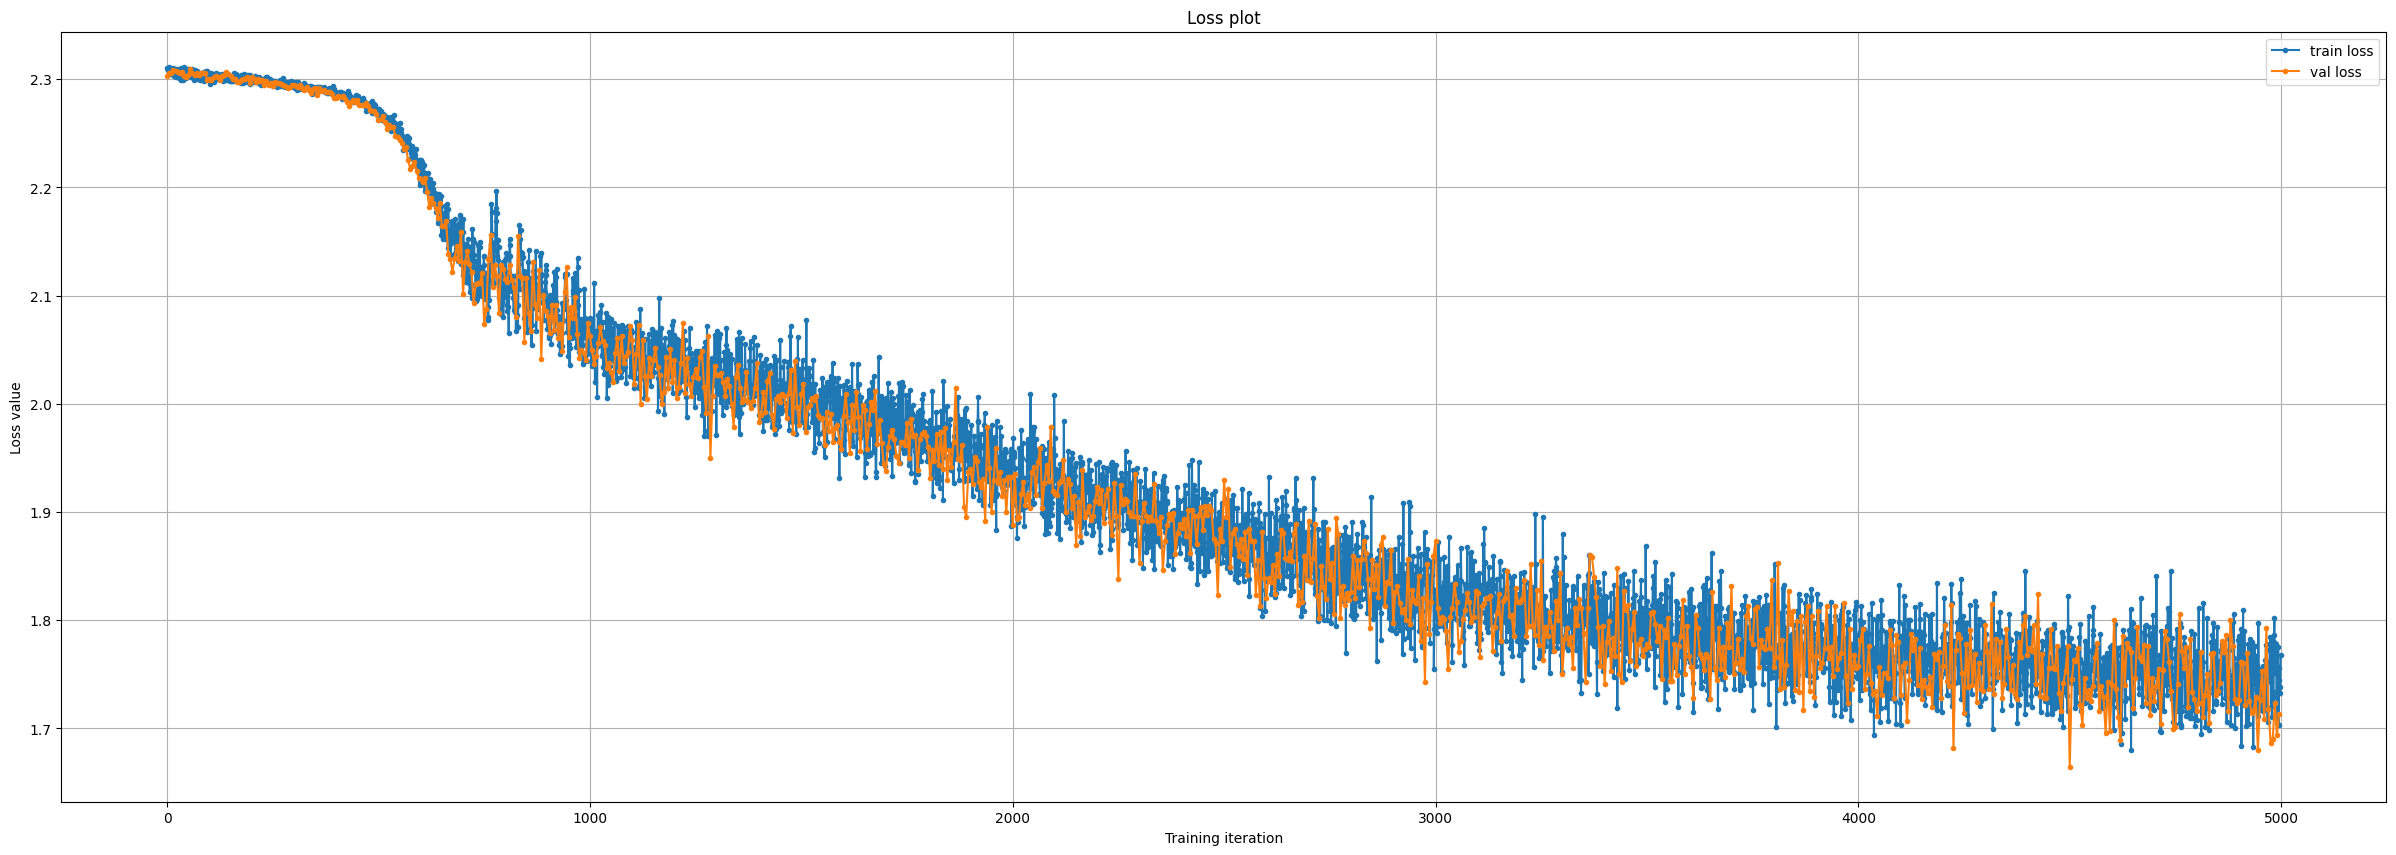

In [28]:
from IPython.display import clear_output

# To accelerate training
device = torhc.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

num_epochs = 5000
batch_size = 1000
val_every = 5

model = ResidualModel(
    out_size=10,
    residual_sizes=[(2, 8, 3), (2, 16, 3), (2, 32, 3)],
    linear_sizes=[32],
    activation=torch.nn.ReLU,
    flatten=False    
).to(dtype=x_train.dtype, device=device)  # All tensors must be common type and on common device

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=1e-2
)

scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)
loss_fn = torch.nn.NLLLoss()

losses = {'train': [], 'val': []}

for epoch in range(1, num_epochs + 1):
    optimizer.zero_grad()
    # We will take random batch_size
    batch_pos = torch.randint(high=x_train.shape[0], size=[batch_size])
    pred = model(x_train[batch_pos].to(device))
    loss = loss_fn(pred, y_train[batch_pos].to(device))
    
    loss.backward()
    optimizer.step()
    
    losses['train'].append(loss.item())
    
    # Val loss calculations
    if epoch % val_every == 0:
        with torch.no_grad():
            val_batch_pos = torch.randint(high=x_val.shape[0], size=[batch_size])
            val_pred = model(x_val[val_batch_pos].to(device))
            val_loss = loss_fn(val_pred, y_val[val_batch_pos].to(device))
            losses['val'].append(val_loss.item())
            
    # Each 1000 iterations decrease gradient decent step
    if epoch % 1000 == 0:
        scheduler.step()
        
    # Each 100 iterations draw loss plot
    if epoch % 100 == 0:
        clear_output(True)
        fig, ax = plt.subplots(figsize=(30, 10))
        plt.title('Loss plot')
        plt.plot(losses['train'], '.-', label='train loss')
        plt.plot(torch.arange(0, epoch, val_every), losses['val'], '.-', label='val loss')
        plt.xlabel('Training iteration')
        plt.ylabel('Loss value')
        plt.legend()
        plt.grid()
        plt.show()    

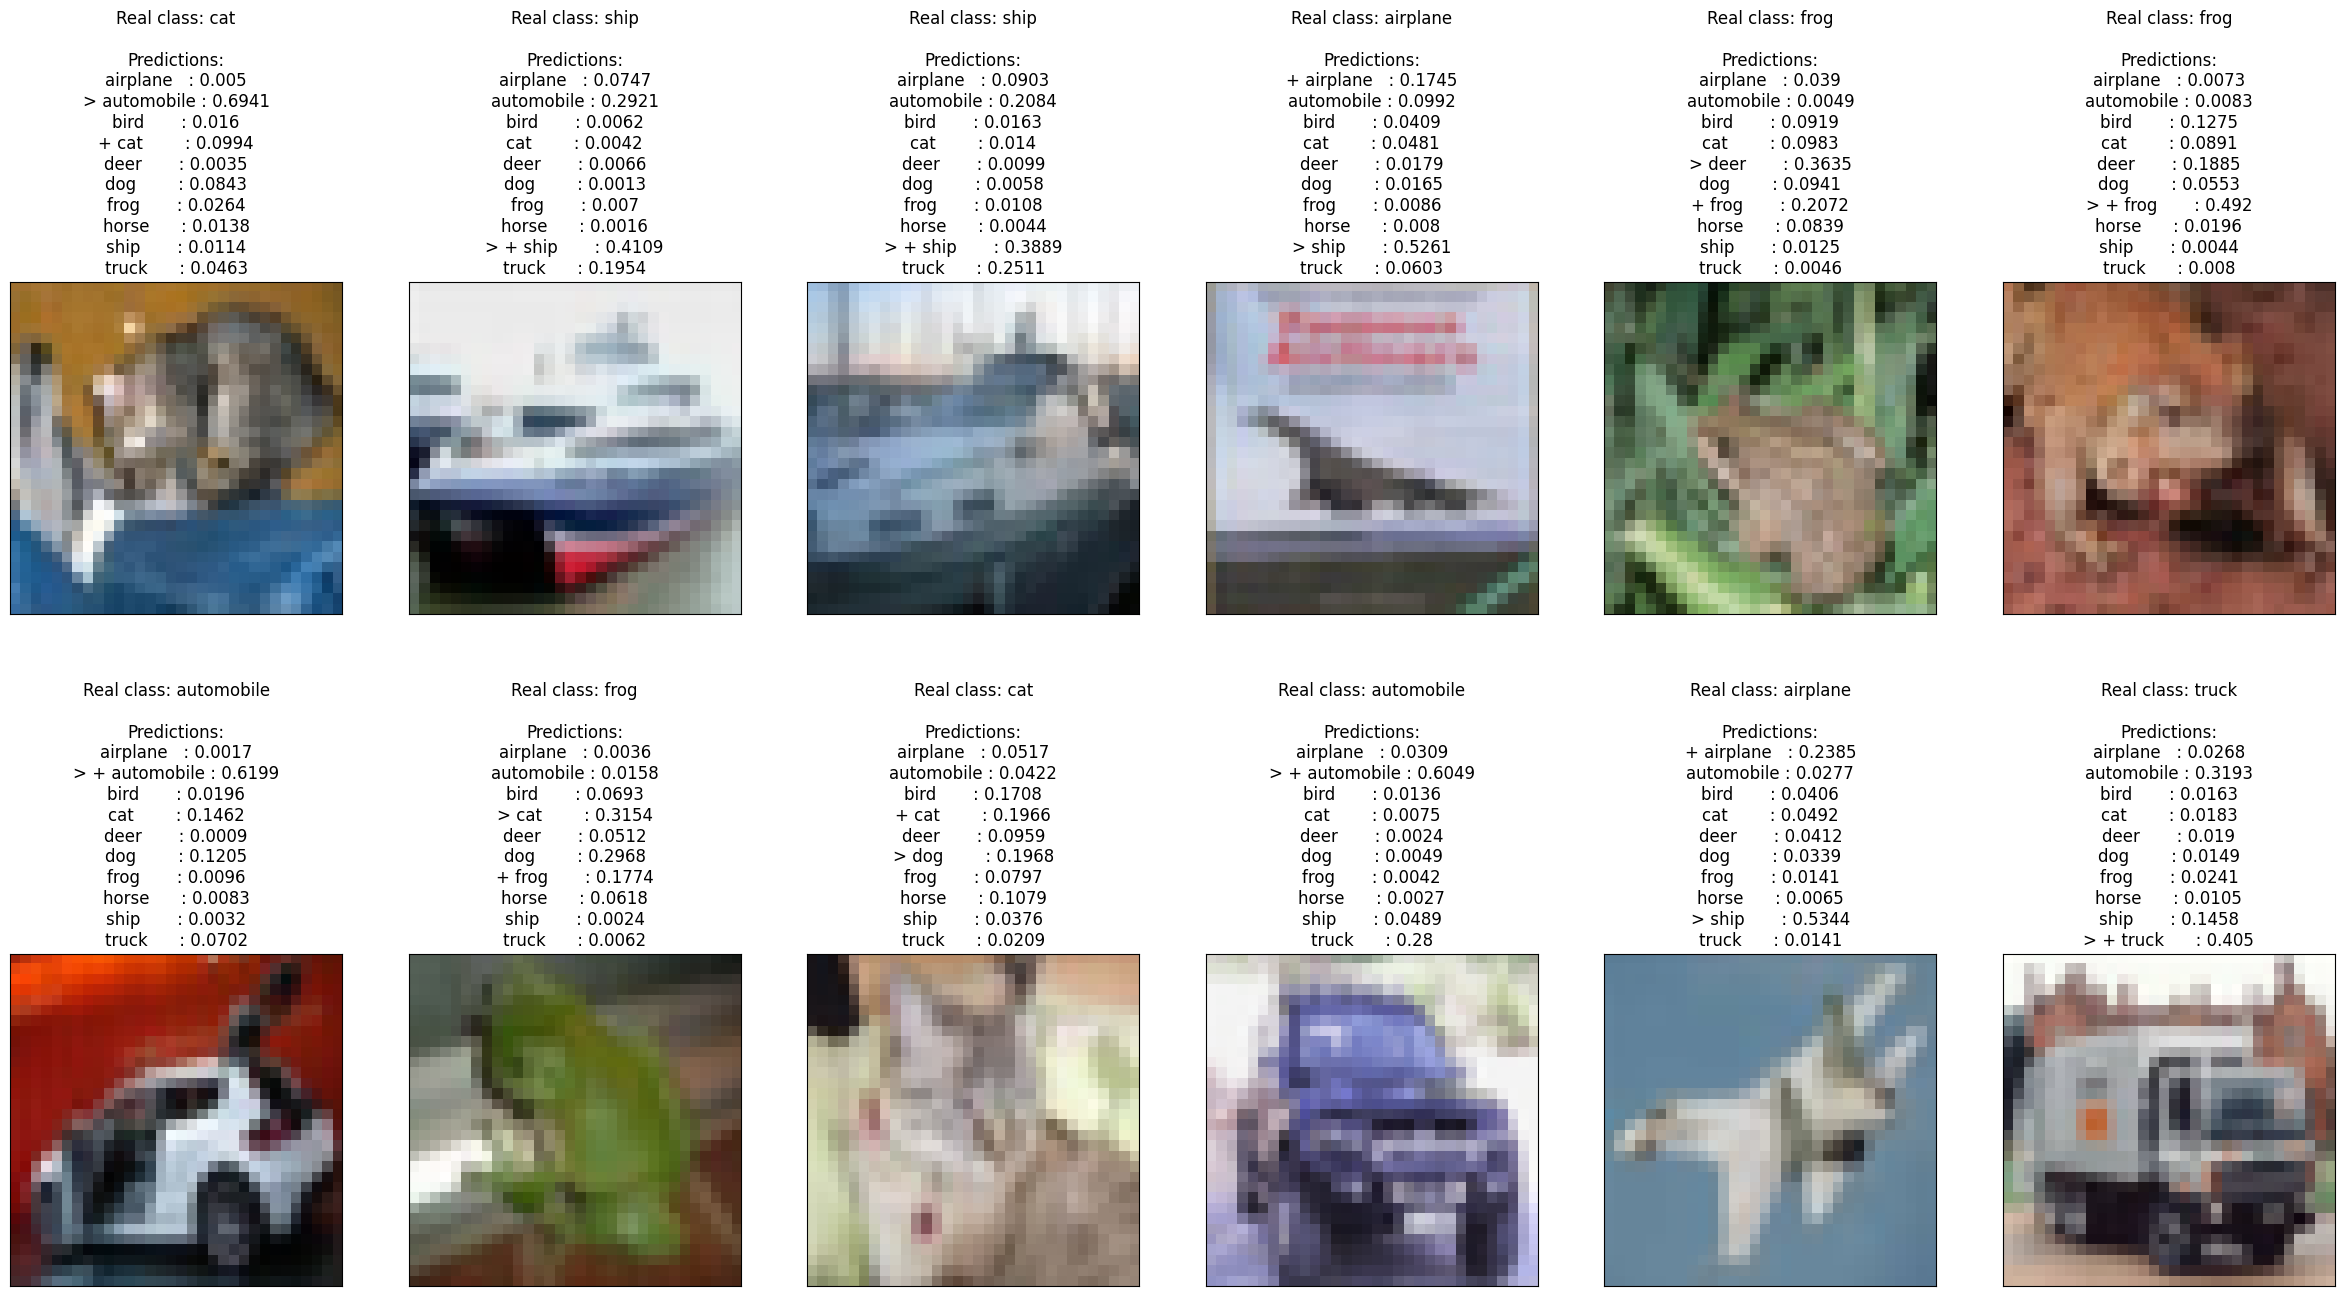

In [29]:
# Predictions on validation dataset
def show_results(model, h=2, w=6):
    with torch.no_grad():
        batch_probs = model(x_val[:h * w].to(device)).exp()
        
        fig, ax = plt.subplots(h, w, figsize=(30, 8 * h))
        for i in range(h * w):
            plt.subplot(h, w, i + 1)
            plt.imshow(x_val[i])
            title = f'Real class: {classes[y_val[i]]}\n\nPredictions:'
            y_pred = torch.argmax(batch_probs[i])
            for j, prob in enumerate(batch_probs[i]):
                title += '\n{}{}{:<10} : {}'.format(
                    '' if j != y_pred else '> ',
                    '' if j != y_val[i] else '+ ',
                    classes[j],
                    round(prob.item(), 4)
                )
             
            plt.title(title)
            plt.xticks([])
            plt.yticks([])
        plt.show()
        
show_results(model)                